In [6]:
from main import *

d:\anaconda3\lib\site-packages\_yaml\__init__.py:23: DeprecationWarning: The _yaml extension module is now located at yaml._yaml and its location is subject to change.  To use the LibYAML-based parser and emitter, import from `yaml`: `from yaml import CLoader as Loader, CDumper as Dumper`.
  DeprecationWarning
d:\anaconda3\lib\site-packages\dask\config.py:12: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Mapping


In [7]:
import os
os.path.split("E:\\Temp_Output\\f6e972089559c30e03fe6fdc8de79c8d\\0ea1b74a5ee4df2660bd25de24b049f2.mp4_271_381.mp4")

('E:\\Temp_Output\\f6e972089559c30e03fe6fdc8de79c8d',
 '0ea1b74a5ee4df2660bd25de24b049f2.mp4_271_381.mp4')

In [ ]:
code_text = "7.41 lcn:/ 参考花友@金米哥哥的楼顶 花友的水管花架详细教程来啦。%%自制花架%%花架%%水管花架  https://v.douyin.com/8tx8Ju3/ 复制此链接，打开Dou音搜索，直接观看视频！"

In [ ]:
code_text = "0.00 AGv:/ 水泥椽条%%铭振古建 %%铭振古建材料   https://v.douyin.com/8w4uPng/ 复制此链接，打开Dou音搜索，直接观看视频！"

In [8]:
import sys
sys.path.insert(0,  "d:\\apps\\nlp\\aieditor")

In [9]:
import sys
sys.path.insert(0,  "/mnt/d/apps/nlp/aieditor")

In [13]:
from service.get_video_url.service import handler_mapper

In [1]:
import re
import requests
user_agent = "Mozilla/5.0 (iPhone; CPU iPhone OS 13_2_3 like Mac OS X) AppleWebKit/605.1.15 (KHTML, like Gecko) Version/13.0.3 Mobile/15E148 Safari/604.1"

download_headers = {
    "accept": "*/*",
    "accept-encoding": "identity;q=1, *;q=0",
    "accept-language": "zh-CN,zh;q=0.9,ja;q=0.8,en;q=0.7,zh-TW;q=0.6,de;q=0.5,fr;q=0.4,ca;q=0.3,ga;q=0.2",
    "range": "bytes=0-",
    "sec-fetch-dest": "video",
    "sec-fetch-mode": "no-cors",
    "sec-fetch-site": "cross-sit",
    "user-agent": user_agent
}


def get_video_url(url: str):
    for v, service in handler_mapper.service_mapper.items():
        if service.get_url(url):
            return service.fetch(url)
    return None


def extract_url(t):
    reg = 'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+'
    url = re.findall(reg, t)
    if len(url) > 0:
        return url[0]
    else:
        return ""


def extract_title(t):
    parts = t.split(":/")
    if len(parts) > 2:
        return parts[1].split("  http")[0].strip()
    else:
        return ""


def extract_video_url_title(input_url):
    url = extract_url(input_url)
    title = extract_title(input_url)

    if len(url) == 0:
        return "", ""

    r = get_video_url(url)
    if r.is_success():
        return r.get_data(), title
    else:
        return "", ""
    
    
# 不要处理超过100M的视频，此时需要返回错误
def download_video(url, save_path, size_limit=104857600):
    try:
        r = requests.get(url, stream=True, allow_redirects=True, headers=download_headers)
        total = int(r.headers.get('content-length', 0))
        if total > size_limit:
            return {"success": False, "msg": "video file is too large, must less than 100Mb!"}
        with open(save_path, 'wb') as f:
            f.write(r.content)
        return {"success": True}
    except Exception as ex:
        return {"success": False, "msg": str(ex)}    

In [39]:
code_text = "0.74 yTl:/ 妻子被人绑架，丈夫居然同事开香槟庆祝%%我的恐怖妻子 %%日剧   https://v.douyin.com/Ne8R7EY/ 复制此链接，打开Dou音搜索，直接观看视频！"

In [5]:
code_text = "8.41 goq:/ %%你要怎么抵抗我   https://v.douyin.com/NSNNYdp/ 复制此链接，打开Dou音搜索，直接观看视频！"

In [8]:
code_text = "6.15 mQk:/ 别划走 来嘛～  https://v.douyin.com/NSNtps6/ 复制此链接，打开Dou音搜索，直接观看视频！"

In [2]:
code_text = "3.00 Slc:/ 一台手机，如何把工厂拍出成品？%%挺友文化 %%手机摄影 %%工厂实拍 %%手机运镜   https://v.douyin.com/YenqbSf/ 复制此链接，打开Dou音搜索，直接观看视频！"

In [14]:
url, title = extract_video_url_title(code_text)
download_video(url, "d:/dy_3.mp4")

{'success': True}

In [2]:
download_video("https://aweme.snssdk.com/aweme/v1/play/?video_id=v0200fg10000c37epddleup53c6mps8g&line=0&ratio=540p&media_type=4&vr_type=0&improve_bitrate=0&is_play_url=1&is_support_h265=0&source=PackSourceEnum_PUBLISH", "d:/es_3.mp4")

{'success': True}

# 独立版本

In [1]:
import hashlib
import json
import os
import shutil
import time
from collections import Counter
import string
import config
import cv2
import requests
import unicodedata
from Levenshtein import ratio
from config import interface_config

from scenedetect.detectors import ContentDetector
# Standard PySceneDetect imports:
from scenedetect import VideoManager
from scenedetect import SceneManager
from PIL import Image

import librosa
import numpy as np
import paddle

from paddlespeech.cli.asr import ASRExecutor
from paddlespeech.s2t.utils.utility import UpdateConfig

from pyvad import split
import copy
from paddlenlp import Taskflow
import paddlehub as hub

"""
use pyvad to split the audio and get the time-stampped ASR result
see https://github.com/F-Tag/python-vad
need install pyvad first:
$ pip install pyvad
"""

splitted_asr_executor, text_correct_model, punc_model = None, None, None

def get_models():
    # asr_model = hub.Module(name='u2_conformer_aishell')
    splitted_asr_executor = SplitASRExecutor()
    text_correct_model = Taskflow("text_correction")
    punc_model = hub.Module(name='auto_punc')
    return splitted_asr_executor, text_correct_model, punc_model


def get_wav(input_file, ar=48000):
    output_file = input_file + "_mono_{}k.wav".format(int(ar / 1000))
    cmd = f"ffmpeg -y -loglevel quiet -i {input_file} -acodec pcm_s16le -ac 1 -ar {ar} {output_file}"
    ret = os.system(cmd)
    if ret == 0:
        return output_file
    else:
        return ""
    
    
def extract_audio(source: str, srate=16000):
    return get_wav(source, srate)


def speech_recognize(file):
    global splitted_asr_executor, text_correct_model, punc_model
    if not splitted_asr_executor:
        splitted_asr_executor, text_correct_model, punc_model = get_models()
    
    # text = asr_model.speech_recognize(file, device='cpu')
    splitted_timelines, ret = splitted_asr_executor(model='conformer_wenetspeech',
        lang='zh',
        sample_rate=16000,
        config=None,  # Set config and ckpt_path to None to use pretrained model.
        ckpt_path=None,
        decode_method='attention_rescoring',
        audio_file=file,
        force_yes=False,
        device=paddle.get_device(),
        verbose=False)

    punc_ret = []
    for text, t in zip(ret, splitted_timelines):
        text_correction = text_correct_model(text)[0]
        cor_text, errors = text_correction['target'], text_correction['errors']
        print(f'[Text Correction] errors: {errors}')
        punc_text = punc_model.add_puncs(cor_text, device='cpu')[0]
        punc_ret.append([t[0], t[1], punc_text])

    return punc_ret


def vad_split(audio_file, srate=16000):
    data, fs = librosa.load(audio_file)
    data = librosa.resample(data, fs, srate)
    data *= 0.95 / np.abs(data).max()
    edges = split(data, srate, fs_vad=srate, hop_length=20, vad_mode=3)
    return data, edges


def get_splitted_timelines(data, edges, srate):
    # fix the begin and end vad frames pos
    edges = copy.deepcopy(edges)
    total_len = len(data)
    edges[len(edges) - 1][1] = total_len - 1
    edges[0][0] = 0

    if len(edges) == 1:
        time_line_pos = [edges[0][0], edges[0][1], edges[0][0], edges[0][1], edges[0][1] - edges[0][0]]
        return [[pos / srate for pos in time_line_pos]]

    # merge too short vad frames(less than 1 seconds)
    new_edges = [edges[0]]
    for i in range(1, len(edges)):
        if edges[i][1] - edges[i][0] < srate:
            new_edges[len(new_edges) - 1][1] = edges[i][1]
        else:
            new_edges.append(edges[i])

    edges = new_edges

    # split at the middle of tow vad edge frames
    time_lines = []
    for i in range(len(edges)):
        if i == 0:
            time_line_pos = [edges[i][0], edges[i][1] + (edges[i + 1][0] - edges[i][1]) / 2,
                             edges[i][0], edges[i][1], edges[i][1] - edges[i][0] + (edges[i + 1][0] - edges[i][1]) / 2]
        elif 0 < i < len(edges) - 1:
            time_line_pos = [edges[i][0] - (edges[i][0] - edges[i - 1][1]) / 2,
                             edges[i][1] + (edges[i + 1][0] - edges[i][1]) / 2,
                             edges[i][0], edges[i][1],
                             edges[i][1] - edges[i][0] + (edges[i][0] - edges[i - 1][1]) / 2 + (
                                     edges[i + 1][0] - edges[i][1]) / 2]
        else:
            time_line_pos = [edges[i][0] - (edges[i][0] - edges[i - 1][1]) / 2, edges[i][1],
                             edges[i][0], edges[i][1], edges[i][1] - edges[i][0] + (edges[i][0] - edges[i - 1][1]) / 2]

        time_line = [pos / srate for pos in time_line_pos]
        time_line.append(time_line_pos[-1] / total_len)
        time_lines.append(time_line)

    return time_lines


def split_audio(inputs, splitted_timelines):
    full_audio = inputs["full_audio"]
    full_audio_len = inputs["full_audio_len"]

    cur_pos = 0
    for t in splitted_timelines:
        cur_len = int(full_audio_len * t[-1])
        audio = full_audio[:, cur_pos:cur_pos + cur_len, :]
        cur_pos += cur_len
        yield audio, paddle.to_tensor(cur_len)


class SplitASRExecutor(ASRExecutor):
    def __init__(self):
        super().__init__()
        self.change_format = False

    def postprocess(self):
        """
            Output postprocess and return human-readable results such as texts and audio files.
        """
        return self._outputs["result"]

    def __call__(self,
                 audio_file: os.PathLike,
                 model: str = 'conformer_wenetspeech',
                 lang: str = 'zh',
                 sample_rate: int = 16000,
                 config: os.PathLike = None,
                 ckpt_path: os.PathLike = None,
                 decode_method: str='attention_rescoring',
                 num_decoding_left_chunks: int=-1,
                 force_yes: bool = False,
                 rtf: bool=False,
                 device=paddle.get_device(),
                 verbose=False):

        if verbose:
            self.disable_task_loggers()
        
        """
        Python API to call an executor.
        """                                
        #self._check(audio_file, sample_rate, force_yes)
        paddle.set_device(device)        
        self._init_from_path(model, lang, sample_rate, config, decode_method,
                             num_decoding_left_chunks, ckpt_path)
        
        audio_file = os.path.abspath(audio_file)
        self.preprocess(model, audio_file)

        self._inputs["full_audio"] = self._inputs["audio"]
        self._inputs["full_audio_len"] = self._inputs["audio_len"]

        data, edeges = vad_split(audio_file, sample_rate)
        self.splitted_timelines = get_splitted_timelines(data, edeges, sample_rate)
        self.audio_data = data

        if verbose:
            self.disable_task_loggers()

        ret = []
        if len(self.splitted_timelines) > 1:
            for audio, audio_len in split_audio(self._inputs, self.splitted_timelines):
                self._inputs["audio"] = audio
                self._inputs["audio_len"] = audio_len
                self.infer(model_type="conformer_wenetspeech")
                ret.append(self._outputs["result"])
        else:
            self.infer(model_type="conformer_wenetspeech")
            ret.append(self._outputs["result"])

        return self.splitted_timelines, ret



def post_to_recognize(image_file_list):
    url = "http://127.0.0.1:8868/predict/ocr_system"

    headers = {"Content-type": "application/json"}
    total_time = 0
    starttime = time.time()
    data = {'images': [], 'paths': image_file_list}
    r = requests.post(url=url, headers=headers, data=json.dumps(data))
    elapse = time.time() - starttime
    total_time += elapse
    return r.json()


def get_hash(url):
    # encoding the string using encode()
    en = url.encode()
    # passing the encoded string to MD5
    hex_result = hashlib.md5(en)
    # printing the equivalent hexadecimal value
    return str(hex_result.hexdigest())


def is_chinese_char(uchar):
    if (uchar >= u'\u4e00' and uchar <= u'\u9fff'):
        return True
    else:
        return False


def is_all_chinese_char(sentence):
    for s in sentence:
        if not is_chinese_char(s):
            return False
    return True


def is_all_english_char(sentence):
    for s in sentence:
        if is_chinese_char(s):
            return False
    return True


def is_float(test_string):
    try:
        float(test_string)
        return True
    except:
        return False


def get_split_spans(splits, fps, frame_count):
    split_spans = []
    # 分段分割出视频
    if "," in splits:
        last_end_frame = 0
        spans = splits.split(",")
        for i in range(len(spans)):
            end_frame = float(spans[i]) * fps
            if end_frame < last_end_frame:
                return None

            if end_frame >= frame_count:
                split_spans.append(frame_count)
                return split_spans
            if end_frame - last_end_frame < fps:
                continue
            last_end_frame = end_frame
            split_spans.append(end_frame)

        if last_end_frame < frame_count:
            split_spans.append(frame_count)

        if len(split_spans) > 0 and int(split_spans[0]) == 0:
            return split_spans[1:]

        return split_spans

    elif is_float(splits.strip()):
        span = float(splits.strip())
        i = 1
        while i * span * fps < frame_count and span > 0:
            split_spans.append(i * span * fps)
            i += 1

        split_spans.append(frame_count)
        return split_spans
    else:
        return None


def cut_video(input_mp4, output_mp4, start, end, debug=False):
    cmd = f'ffmpeg -loglevel quiet -y -ss {start} -to {end} -i {input_mp4}  {output_mp4}'
    r = os.system(cmd)
    if debug:
        print(cmd)
    if r == 0:
        return output_mp4
    else:
        return ""


def export_cover(input_mp4, output_jpeg, debug=False):
    cmd = f'ffmpeg -loglevel quiet -y -i {input_mp4} -f image2 -frames 1 {output_jpeg}'
    r = os.system(cmd)
    if debug:
        print(cmd)
    if r == 0:
        return output_jpeg
    else:
        return ""


class AutoSubtitleExtractor():
    """
    视频字幕提取类
    """

    def __init__(self, vd_path, export_key_frames):
        self.sub_area = None
        self.export_key_frames = export_key_frames
        self.export_cut_video = True
        self.debug = False
        self.remove_too_common = True
        self.detect_subtitle = True
        self.detect_scene = False
        self.no_cut = True
        self.splits = ""
        self.split_spans = []
        self.scenes = []

        # 字幕区域位置
        self.subtitle_area = config.SubtitleArea.LOWER_PART

        # 临时存储文件夹
        # self.temp_output_dir = os.path.join(os.path.dirname(config.BASE_DIR), 'output')
        self.temp_output_dir = os.path.join(config.TEMP_OUTPUT_DIR, get_hash(vd_path))

        # 视频路径
        self.video_path = vd_path
        self.video_cap = cv2.VideoCapture(vd_path)
        # 视频帧总数
        self.frame_count = self.video_cap.get(cv2.CAP_PROP_FRAME_COUNT)
        # 视频帧率
        self.fps = self.video_cap.get(cv2.CAP_PROP_FPS)
        # 视频秒数
        self.video_length = float(self.frame_count / self.fps)
        # 视频尺寸
        self.frame_height = int(self.video_cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
        self.frame_width = int(self.video_cap.get(cv2.CAP_PROP_FRAME_WIDTH))
        self.size = (self.frame_width, self.frame_height)

        # 提取的视频帧储存目录
        self.frame_output_dir = os.path.join(self.temp_output_dir, 'frames')
        # 提取的字幕文件存储目录
        self.subtitle_output_dir = os.path.join(self.temp_output_dir, 'subtitle')
        # 定义vsf的字幕输出路径
        self.vsf_subtitle = os.path.join(self.subtitle_output_dir, 'raw_vsf.srt')
        # 不存在则创建文件夹
        if not os.path.exists(self.frame_output_dir):
            os.makedirs(self.frame_output_dir)
        if not os.path.exists(self.subtitle_output_dir):
            os.makedirs(self.subtitle_output_dir)
        # 提取的原始字幕文本存储路径
        self.raw_subtitle_path = os.path.join(self.subtitle_output_dir, 'raw.txt')

        # 处理进度
        self.progress = 0

    def run(self):

        # 指定分割点时不输出关键帧，不检查场景
        if len(self.splits) > 0:
            self.export_key_frames = False
            self.detect_scene = False

        """
        运行整个提取视频的步骤
        """
        print(interface_config['Main']['StartProcessFrame'])
        self.extract_frame_by_fps()

        print(interface_config['Main']['FinishProcessFrame'])

        print(interface_config['Main']['StartFindSub'])
        # 重置进度条
        self.progress = 0
        self.extract_subtitles()
        print(interface_config['Main']['FinishFindSub'])

        print(interface_config['Main']['StartGenerateSub'])
        # 判断是否开启精准模式
        result = self.generate_subtitle_file()

        # 清理临时文件
        # self._delete_frame_cache()

        # 如果识别的字幕语言包含英文，则将英文分词
        # if config.REC_CHAR_TYPE in ('ch', 'EN', 'en', 'ch_tra'):
        #     reformat(os.path.join(os.path.splitext(self.video_path)[0] + '.srt'))

        print(interface_config['Main']['FinishGenerateSub'])
        self.progress = 100

        return result

    # todo: 继续优化，为了兼容去台标处理，可以考虑不切分，而使用全OCR识别，字幕区域可以使用算法去除
    def extract_frame_by_fps(self):
        """
        根据帧率，定时提取视频帧，容易丢字幕，但速度快
        """
        # 删除缓存
        self.delete_frame_cache()

        # 当前视频帧的帧号
        frame_no = 0

        while self.video_cap.isOpened():
            ret, frame = self.video_cap.read()
            # 如果读取视频帧失败（视频读到最后一帧）
            if not ret:
                break
            # 读取视频帧成功
            else:
                frame_no += 1

                filename = os.path.join(self.frame_output_dir, str(frame_no).zfill(8) + '.jpg')

                if self.export_key_frames:
                    # 保存原始视频帧，保存为jpg，临时使用png文件名
                    org_filename = os.path.join(self.frame_output_dir, str(frame_no).zfill(8) + '.org.png')
                    cv2.imwrite(filename, frame)
                    os.rename(filename, org_filename)

                if not self.no_cut:
                    frame = self._frame_preprocess(frame)

                # 帧名往前补零，后续用于排序与时间戳转换，补足8位
                # 一部10h电影，fps120帧最多也才1*60*60*120=432000 6位，所以8位足够

                # 保存截取的原视频帧
                cv2.imwrite(filename, frame)

                # 跳过剩下的帧
                for i in range(int(self.fps // config.EXTRACT_FREQUENCY) - 1):
                    ret, _ = self.video_cap.read()
                    if ret:
                        frame_no += 1
                        # 更新进度条
                        self.progress = (frame_no / self.frame_count) * 100

        self.video_cap.release()

    def extract_subtitles(self):
        """
        提取视频帧中的字幕信息，生成一个txt文件
        """
        global image_file_list

        # 删除缓存
        if os.path.exists(self.raw_subtitle_path):
            os.remove(self.raw_subtitle_path)
        # 新建文件
        with open(self.raw_subtitle_path, mode='w+', encoding='utf-8') as f:
            # 视频帧列表
            frame_list = [i for i in sorted(os.listdir(self.frame_output_dir)) if i.endswith('.jpg')]
            image_file_list = [os.path.join(self.frame_output_dir, i).replace("\\", "/") for i in frame_list]

            rec_result = post_to_recognize(image_file_list)

            for i, (frame, rec_ret) in enumerate(zip(frame_list, rec_result["results"])):
                dt_box = [r["text_region"] for r in rec_ret]
                rec_res = [(r["text"], r["confidence"]) for r in rec_ret]
                coordinates = self._get_coordinates(dt_box)

                # 写入返回结果
                for content, coordinate in zip(rec_res, coordinates):
                    if content[1] > config.DROP_SCORE:
                        f.write(f'{os.path.splitext(frame)[0]}\t'
                                f'{coordinate}\t'
                                f'{content[0]}\n')
                        # 关闭文件
            f.close()

            if self.debug:
                shutil.copyfile(self.raw_subtitle_path, self.raw_subtitle_path + ".raw.txt")

    def find_scenes(self, threshold=30.0):
        # Create our video & scene managers, then add the detector.
        video_manager = VideoManager([self.video_path])
        scene_manager = SceneManager()
        scene_manager.add_detector(
            ContentDetector(threshold=threshold))

        # Improve processing speed by downscaling before processing.
        video_manager.set_downscale_factor()

        # Start the video manager and perform the scene detection.
        video_manager.start()
        scene_manager.detect_scenes(frame_source=video_manager)

        # Each returned scene is a tuple of the (start, end) timecode.
        return scene_manager.get_scene_list()

    def generate_subtitle_file(self):
        """
        生成srt格式的字幕文件
        """
        if self.detect_scene:
            scenes_codes = self.find_scenes()
            self.scenes = [[] for i in range(len(scenes_codes))]

        # 先检测并删除可能的台标或者背景，然后才能，所以需要考虑
        if self.remove_too_common:
            self._remove_too_common()

        if self.detect_subtitle:
            self.filter_scene_text()

        subtitle_content = self._remove_duplicate_subtitle()

        srt_filename = os.path.join(os.path.splitext(self.video_path)[0] + '.srt')
        processed_subtitle = []

        print(f"splits:{self.splits}, fps:{self.fps}, frame_count:{self.frame_count}")

        # todo: auto_split的需要调用asr的声音分割处理
        split_spans = []
        if len(self.splits) > 0:
            cur_split_lines = ""
            last_span_no = 0
            last_span_frame = 1
            split_spans = get_split_spans(self.splits, self.fps, self.frame_count)
            self.split_spans = split_spans
            self.scenes = [[] for _ in range(len(split_spans))]

        with open(srt_filename, mode='w', encoding='utf-8') as f:
            for index, content in enumerate(subtitle_content):
                line_code = index + 1
                frame_no_start = int(content[0])
                frame_start = self._frame_to_timecode(frame_no_start)
                # 比较起始帧号与结束帧号， 如果字幕持续时间不足1秒，则将显示时间设为1s
                if abs(int(content[1]) - int(content[0])) < self.fps:
                    frame_no_end = int(int(content[0]) + self.fps)
                    frame_end = self._frame_to_timecode(frame_no_end)
                else:
                    frame_no_end = int(content[1])
                    frame_end = self._frame_to_timecode(frame_no_end)
                frame_content = content[2]
                processed_subtitle.append([frame_start, frame_end, frame_no_start, frame_no_end, frame_content])
                subtitle_line = f'{line_code}\n{frame_start} --> {frame_end}\n{frame_content}\n'
                f.write(subtitle_line)

                # 简单算法，按场景将字幕时间轴分组出来
                if self.detect_scene:
                    last_scene_no = 0
                    for i in range(last_scene_no, len(scenes_codes)):
                        s = scenes_codes[i]
                        if frame_no_start >= int(s[0]) and frame_no_end <= int(s[1]):
                            last_scene_no = i
                            if len(self.scenes[i]) > 0:
                                self.scenes[i][1] = frame_end
                                self.scenes[i][2].append(index)
                            else:
                                self.scenes[i] = [frame_start, frame_end, [index]]

                # 按指定分割来分场景出来
                if len(split_spans) > 0:
                    # 需要在拼接前去除重复
                    phrases = set()
                    if len(cur_split_lines) > 0:
                        for line in cur_split_lines.split("\n"):
                            for part in line.split(" "):
                                phrases.add(part.strip())

                    for part in frame_content.split(" "):
                        if not part.replace("\n", "") in phrases:
                            cur_split_lines += " " + part

                    if last_span_no < len(split_spans) and frame_no_end >= split_spans[last_span_no]:
                        # 此处有需要跳过部分无字幕的部分场景分段，使last_span_no增大跨度
                        while last_span_no + 1 < len(split_spans) and frame_no_end >= split_spans[last_span_no + 1]:
                            last_span_no += 1
                            if last_span_frame < int(split_spans[last_span_no - 1]):
                                last_span_frame = int(split_spans[last_span_no - 1])

                        split_vd_filename = os.path.join(self.temp_output_dir,
                                                         os.path.split(self.video_path)[1] + "_" + str(
                                                             last_span_frame) + "_" + str(frame_no_end) + ".mp4")
                        split_cover_filename = split_vd_filename[:-4] + ".jpg"

                        print(f"cut video {last_span_frame} to {frame_no_end}")

                        if self.export_cut_video:
                            if not os.path.isfile(split_vd_filename):
                                cut_video(self.video_path, split_vd_filename, last_span_frame / self.fps,
                                          frame_no_end / self.fps)
                            if not os.path.isfile(split_cover_filename):
                                export_cover(split_vd_filename, split_cover_filename)

                        self.scenes[last_span_no] = [self._frame_to_timecode(last_span_frame), frame_end,
                                                     cur_split_lines, split_vd_filename, split_cover_filename,
                                                     (frame_no_end - last_span_frame) / self.fps, frame_no_end]
                        cur_split_lines = ""
                        last_span_no += 1
                        last_span_frame = frame_no_end

        # 补上空白视频位置和最后的尾部字幕
        if len(split_spans) > 0:
            for i in range(len(self.scenes)):
                if len(self.scenes[i]) == 0:
                    if i == 0:
                        last_span_frame = 1
                    else:
                        last_span_frame = int(split_spans[i - 1])
                        last_scenes_end_frame_no = int(self.scenes[i - 1][6])
                        if last_scenes_end_frame_no > last_span_frame:
                            last_span_frame = last_scenes_end_frame_no

                    frame_no_end = int(split_spans[i])
                    split_vd_filename = os.path.join(self.temp_output_dir,
                                                     os.path.split(self.video_path)[1] + "_" + str(
                                                         last_span_frame) + "_" + str(frame_no_end) + ".mp4")
                    split_cover_filename = split_vd_filename[:-4] + ".jpg"

                    print(f"cut video {last_span_frame} to {frame_no_end}")

                    if not os.path.isfile(split_vd_filename):
                        cut_video(self.video_path, split_vd_filename, last_span_frame / self.fps,
                                  frame_no_end / self.fps)
                    if not os.path.isfile(split_cover_filename):
                        export_cover(split_vd_filename, split_cover_filename)

                    subtitles = ""
                    if i == len(self.scenes) - 1 and len(cur_split_lines) > 0:
                        subtitles = cur_split_lines

                    self.scenes[i] = [self._frame_to_timecode(last_span_frame), self._frame_to_timecode(frame_no_end),
                                      subtitles,
                                      split_vd_filename,
                                      split_cover_filename,
                                      (frame_no_end - last_span_frame) / self.fps, frame_no_end]

        print(f"{interface_config['Main']['SubLocation']} {srt_filename}")

        # 保存原始关键帧
        # 取得保存路径，拼到kfs目录下
        if self.export_key_frames:
            for f in processed_subtitle:
                org_filename = os.path.join(self.frame_output_dir, str(f[2]).zfill(8) + '.org.png')
                f.append(org_filename)
                f.append(str(f[2]).zfill(8) + ".jpg")

        # self.split_spans = split_spans
        return processed_subtitle

    def _frame_preprocess(self, frame):
        """
        将视频帧进行裁剪
        """
        # 对于分辨率大于1920*1080的视频，将其视频帧进行等比缩放至1280*720进行识别
        # paddlepaddle会将图像压缩为640*640
        # if self.frame_width > 1280:
        #     scale_rate = round(float(1280 / self.frame_width), 2)
        #     frames = cv2.resize(frames, None, fx=scale_rate, fy=scale_rate, interpolation=cv2.INTER_AREA)
        cropped = int(frame.shape[0] // 2) - config.SUBTITLE_AREA_DEVIATION_PIXEL

        # 如果字幕出现的区域在下部分
        if self.subtitle_area == config.SubtitleArea.LOWER_PART:
            # 将视频帧切割为下半部分
            frame = frame[cropped:]
        # 如果字幕出现的区域在上半部分
        elif self.subtitle_area == config.SubtitleArea.UPPER_PART:
            # 将视频帧切割为下半部分
            frame = frame[:cropped]
        return frame

    def _frame_to_timecode(self, frame_no):
        """
        将视频帧转换成时间
        :param frame_no: 视频的帧号，i.e. 第几帧视频帧
        :returns: SMPTE格式时间戳 as string, 如'01:02:12:32' 或者 '01:02:12;32'
        """
        # 设置当前帧号
        # cap = cv2.VideoCapture(self.video_path)
        # cap.set(cv2.CAP_PROP_POS_FRAMES, frame_no)
        # cap.read()
        # 获取当前帧号对应的时间戳
        # milliseconds = cap.get(cv2.CAP_PROP_POS_MSEC)
        milliseconds = 1000 / self.fps * frame_no
        seconds = milliseconds // 1000
        milliseconds = int(milliseconds % 1000)
        minutes = 0
        hours = 0
        if seconds >= 60:
            minutes = int(seconds // 60)
            seconds = int(seconds % 60)
        if minutes >= 60:
            hours = int(minutes // 60)
            minutes = int(minutes % 60)
        smpte_token = ','
        # cap.release()
        return "%02d:%02d:%02d%s%02d" % (hours, minutes, seconds, smpte_token, milliseconds)

    def _remove_duplicate_subtitle(self):
        """
        读取原始的raw txt，去除重复行，返回去除了重复后的字幕列表
        """
        self._concat_content_with_same_frameno()

        with open(self.raw_subtitle_path, mode='r', encoding='utf-8') as r:
            lines = r.readlines()
        content_list = []
        for line in lines:
            frame_no = line.split('\t')[0]
            content = line.split('\t')[2]
            # 只有一个字的一般是误识别，可以忽略
            if len(content) < 3:
                continue

            content_list.append((frame_no, content))

        # 循环遍历每行字幕，记录开始时间与结束时间
        index = 0
        # 去重后的字幕列表
        unique_subtitle_list = []
        for i in content_list:
            # TODO: 时间复杂度非常高，有待优化
            # 定义字幕开始帧帧号
            start_frame = i[0]
            for j in content_list[index:]:
                # 计算当前行与下一行的Levenshtein距离
                distance = ratio(i[1], j[1])
                if distance < config.THRESHOLD_TEXT_SIMILARITY or j == content_list[-1]:
                    # 定义字幕结束帧帧号
                    end_frame = content_list[content_list.index(j) - 1][0]
                    if end_frame == start_frame:
                        end_frame = j[0]
                    # 如果是第一行字幕，直接添加进列表
                    if len(unique_subtitle_list) < 1:
                        unique_subtitle_list.append((start_frame, end_frame, i[1]))
                    else:
                        string_a = unique_subtitle_list[-1][2].replace(' ', '').translate(
                            str.maketrans('', '', string.punctuation))
                        string_b = i[1].replace(' ', '').translate(str.maketrans('', '', string.punctuation))
                        similarity_ratio = ratio(string_a, string_b)
                        # 打印相似度
                        # print(f'{similarity_ratio}: {unique_subtitle_list[-1][2]} vs {i[1]}')
                        # 如果相似度小于阈值，说明该两行字幕不一样
                        if similarity_ratio < config.THRESHOLD_TEXT_SIMILARITY:
                            unique_subtitle_list.append((start_frame, end_frame, i[1]))
                        else:
                            # todo，相似的取出现次数更多的来保留!!!!!，现在的算法是有问题的。取长的是为了防止飞字，但是第一个容易误识别
                            # 如果大于阈值，但又不完全相同，说明两行字幕相似
                            # 可能出现以下情况: "但如何进人并接管上海" vs "但如何进入并接管上海"
                            # OCR识别出现了错误识别
                            if similarity_ratio < 1:
                                if len(string_a) < len(string_b):
                                    unique_subtitle_list[-1] = (start_frame, end_frame, i[1])
                    index += 1
                    break
                else:
                    continue
        return unique_subtitle_list

    def _remove_too_common(self):
        """
        将raw txt文本中具有相同帧号的字幕行合并
        # todo: 通过重复计数，移除超过次数的文本，可能是台标
        """
        with open(self.raw_subtitle_path, mode='r', encoding='utf-8') as r:
            lines = r.readlines()

        content_list = []
        frame_no_list = []
        contents = []
        for line in lines:
            frame_no = line.split('\t')[0]
            coordinate = line.split('\t')[1]
            content = line.split('\t')[2]
            if content.strip().startswith("抖音号:"):
                continue
            frame_no_list.append(frame_no)
            contents.append(content)
            content_list.append([frame_no, coordinate, content])

        max_common_count = 15

        self.too_commons = set()
        self.counter = Counter(contents).most_common()
        for c in self.counter:
            if c[1] > max_common_count and len(c[0]) < 12:
                self.too_commons.add(c[0])
            else:
                break

        with open(self.raw_subtitle_path, mode='w', encoding='utf-8') as f:
            for frame_no, coordinate, content in content_list:
                if not content in self.too_commons:
                    content = unicodedata.normalize('NFKC', content)
                    f.write(f'{frame_no}\t{coordinate}\t{content}')

    def _concat_content_with_same_frameno(self):
        with open(self.raw_subtitle_path, mode='r', encoding='utf-8') as r:
            lines = r.readlines()

        content_list = []
        frame_no_list = []
        contents = []
        for line in lines:
            frame_no = line.split('\t')[0]
            frame_no_list.append(frame_no)
            coordinate = line.split('\t')[1]
            content = line.split('\t')[2]
            contents.append(content)
            content_list.append([frame_no, coordinate, content])

        # 找出那些不止一行的帧号
        frame_no_list = [i[0] for i in Counter(frame_no_list).most_common() if i[1] > 1]

        # 找出这些帧号出现的位置
        concatenation_list = []
        for frame_no in frame_no_list:
            position = [i for i, x in enumerate(content_list) if x[0] == frame_no]
            concatenation_list.append((frame_no, position))

        for i in concatenation_list:
            content = []
            for j in i[1]:
                txt = content_list[j][2]
                txt = txt.replace(" ", "").replace('\n', '')
                # 全部是英文的不要处理，过短的不要处理，一般都是识别错误
                if not is_all_english_char(txt) and len(txt) > 2:
                    if len(content) < 9:
                        pos = content_list[j][1].split('(')[1].split(')')[0].split(', ')
                        pos_center = int(pos[0]) + int((int(pos[1]) - int(pos[0])) / 2)
                        if pos_center > self.frame_width / 2 - 150 and pos_center < self.frame_width / 2 + 150:
                            content.append(txt)
                    else:
                        content.append(txt)

            content = ' '.join(content) + '\n'
            for k in i[1]:
                content_list[k][2] = content

        # 将多余的字幕行删除
        to_delete = []
        for i in concatenation_list:
            for j in i[1][1:]:
                to_delete.append(content_list[j])

        # 移出空白行
        for i in content_list:
            if len(i[2].replace("\n", "").strip()) == 0:
                to_delete.append(i)

        for i in to_delete:
            if i in content_list:
                content_list.remove(i)

        with open(self.raw_subtitle_path, mode='w', encoding='utf-8') as f:
            for frame_no, coordinate, content in content_list:
                skip = False
                if len(content) < 9:
                    # coordinate = content_list[j][1]
                    pos = coordinate.split('(')[1].split(')')[0].split(', ')
                    pos_center = int(pos[0]) + int((int(pos[1]) - int(pos[0])) / 2)
                    if pos_center > self.frame_width / 2 - 150 and pos_center < self.frame_width / 2 + 150:
                        content = unicodedata.normalize('NFKC', content)
                    else:
                        skip = True
                else:
                    content = unicodedata.normalize('NFKC', content)
                if not skip:
                    f.write(f'{frame_no}\t{coordinate}\t{content}')

    def _detect_watermark_area(self):
        """
        根据识别出来的raw txt文件中的坐标点信息，查找水印区域
        假定：水印区域（台标）的坐标在水平和垂直方向都是固定的，也就是具有(xmin, xmax, ymin, ymax)相对固定
        根据坐标点信息，进行统计，将一直具有固定坐标的文本区域选出
        :return 返回最有可能的水印区域
        """
        with open(self.raw_subtitle_path, mode='r', encoding='utf-8') as f:  # 打开txt文件，以‘utf-8’编码读取
            line = f.readline()  # 以行的形式进行读取文件
            # 坐标点列表
            coordinates_list = []
            # 帧列表
            frame_no_list = []
            # 内容列表
            content_list = []
            while line:
                frame_no = line.split('\t')[0]
                text_position = line.split('\t')[1].split('(')[1].split(')')[0].split(', ')
                content = line.split('\t')[2]
                frame_no_list.append(frame_no)
                coordinates_list.append((int(text_position[0]),
                                         int(text_position[1]),
                                         int(text_position[2]),
                                         int(text_position[3])))
                content_list.append(content)
                line = f.readline()
            f.close()
            # 将坐标列表的相似值统一
            coordinates_list = self._unite_coordinates(coordinates_list)

            # 将原txt文件的坐标更新为归一后的坐标
            with open(self.raw_subtitle_path, mode='w', encoding='utf-8') as f:
                for frame_no, coordinate, content in zip(frame_no_list, coordinates_list, content_list):
                    f.write(f'{frame_no}\t{coordinate}\t{content}')

            if len(Counter(coordinates_list).most_common()) > config.WATERMARK_AREA_NUM:
                # 读取配置文件，返回可能为水印区域的坐标列表
                return Counter(coordinates_list).most_common(config.WATERMARK_AREA_NUM)
            else:
                # 不够则有几个返回几个
                return Counter(coordinates_list).most_common()

    def _detect_subtitle_area(self):
        """
        读取过滤水印区域后的raw txt文件，根据坐标信息，查找字幕区域
        假定：字幕区域在y轴上有一个相对固定的坐标范围，相对于场景文本，这个范围出现频率更高
        :return 返回字幕的区域位置
        """
        # 打开去水印区域处理过的raw txt
        with open(self.raw_subtitle_path, mode='r', encoding='utf-8') as f:  # 打开txt文件，以‘utf-8’编码读取
            line = f.readline()  # 以行的形式进行读取文件
            # y坐标点列表
            y_coordinates_list = []
            while line:
                text_position = line.split('\t')[1].split('(')[1].split(')')[0].split(', ')
                y_coordinates_list.append((int(text_position[2]), int(text_position[3])))
                line = f.readline()
            f.close()
            return Counter(y_coordinates_list).most_common(5)

    def filter_scene_text(self):
        # 检查水印区域，并处理区域合并
        # 此处需要重构，最多的一个未尝是正确的
        self._detect_watermark_area()

        # 统计比较前5个，取字符数量最多的前两个加入到最终的字幕中
        subtile_areas = self._detect_subtitle_area()

        print("subtitle area detected:" + str(len(subtile_areas)))

        with open(self.raw_subtitle_path, mode='r+', encoding='utf-8') as f:
            content = f.readlines()

            area_subtitles = []
            for i in range(len(subtile_areas)):
                subtitle_area = subtile_areas[i][0]

                # 为了防止有双行字幕，根据容忍度，将字幕区域y范围加高
                ymin = abs(subtitle_area[0] - config.SUBTITLE_AREA_DEVIATION_PIXEL)
                ymax = subtitle_area[1] + config.SUBTITLE_AREA_DEVIATION_PIXEL

                area_subtitles.append(((ymin, ymax), set()))

                # todo: 这里可以再加一个判断，对于整体长度和位置的
                for i in content:
                    i_ymin = int(i.split('\t')[1].split('(')[1].split(')')[0].split(', ')[2])
                    i_ymax = int(i.split('\t')[1].split('(')[1].split(')')[0].split(', ')[3])
                    if ymin <= i_ymin and i_ymax <= ymax:
                        area_subtitles[-1][1].update(set(i))

            self.areas = []
            for i, sa in enumerate(area_subtitles):
                if len(sa[1]) > 50 and len(self.areas) < 3:
                    self.areas.append(sa[0])

            if len(self.areas) == 0:
                if len(area_subtitles) > 0:
                    self.areas.append(area_subtitles[0][0])

            f.seek(0)
            for i in content:
                i_ymin = int(i.split('\t')[1].split('(')[1].split(')')[0].split(', ')[2])
                i_ymax = int(i.split('\t')[1].split('(')[1].split(')')[0].split(', ')[3])
                if len(self.areas) > 0:
                    for (ymin, ymax) in self.areas:
                        if ymin <= i_ymin and i_ymax <= ymax:
                            f.write(i)
                            break
                else:
                    f.write(i)

                f.truncate()
            f.close()

    def _unite_coordinates(self, coordinates_list):
        """
        给定一个坐标列表，将这个列表中相似的坐标统一为一个值
        e.g. 由于检测框检测的结果不是一致的，相同位置文字的坐标可能一次检测为(255,123,456,789)，另一次检测为(253,122,456,799)
        因此要对相似的坐标进行值的统一
        :param coordinates_list 包含坐标点的列表
        :return: 返回一个统一值后的坐标列表
        """
        # 将相似的坐标统一为一个
        index = 0
        for coordinate in coordinates_list:  # TODO：时间复杂度n^2，待优化
            for i in coordinates_list:
                if self._is_coordinate_similar(coordinate, i):
                    coordinates_list[index] = i
            index += 1
        return coordinates_list

    def _get_coordinates(self, dt_box):
        """
        从返回的检测框中获取坐标
        :param dt_box 检测框返回结果
        :return list 坐标点列表
        """
        coordinate_list = list()
        if isinstance(dt_box, list):
            for i in dt_box:
                i = list(i)
                (x1, y1) = int(i[0][0]), int(i[0][1])
                (x2, y2) = int(i[1][0]), int(i[1][1])
                (x3, y3) = int(i[2][0]), int(i[2][1])
                (x4, y4) = int(i[3][0]), int(i[3][1])
                xmin = max(x1, x4)
                xmax = min(x2, x3)
                ymin = max(y1, y2)
                ymax = min(y3, y4)
                coordinate_list.append((xmin, xmax, ymin, ymax))
        return coordinate_list

    def _is_coordinate_similar(self, coordinate1, coordinate2):
        """
        计算两个坐标是否相似，如果两个坐标点的xmin,xmax,ymin,ymax的差值都在像素点容忍度内
        则认为这两个坐标点相似
        """
        return abs(coordinate1[0] - coordinate2[0]) < config.PIXEL_TOLERANCE_X and \
               abs(coordinate1[1] - coordinate2[1]) < config.PIXEL_TOLERANCE_X and \
               abs(coordinate1[2] - coordinate2[2]) < config.PIXEL_TOLERANCE_Y and \
               abs(coordinate1[3] - coordinate2[3]) < config.PIXEL_TOLERANCE_Y

    def delete_frame_cache(self):
        if len(os.listdir(self.frame_output_dir)) > 0:
            for i in os.listdir(self.frame_output_dir):
                os.remove(os.path.join(self.frame_output_dir, i))

Running Verify Fluid Program ... 
Your Paddle Fluid works well on SINGLE GPU or CPU.


 1. There is only 1 or 0 GPU visible on your Device;
 2. No.1 or No.2 GPU or both of them are occupied now
 3. Wrong installation of NVIDIA-NCCL2, please follow instruction on https://github.com/NVIDIA/nccl-tests 
 to test your NCCL, or reinstall it following https://docs.nvidia.com/deeplearning/sdk/nccl-install-guide/index.html



 Original Error is: (Unavailable) Windows can support Single GPU only.
  [Hint: Expected device_count == 1, but received device_count:2 != 1:1.] (at ..\paddle\fluid\framework\parallel_executor.cc:1165)

Your Paddle Fluid is installed successfully ONLY for SINGLE GPU or CPU! 
 Let's start deep Learning with Paddle Fluid now
识别字幕语言：ch
识别模式：fast
Model Base：D:\apps\nlp\models\ocr
Temp Output Dir：E:\Temp_Output
使用GPU进行加速


d:\anaconda3\lib\site-packages\_yaml\__init__.py:23: DeprecationWarning: The _yaml extension module is now located at yaml._yaml and its location is subject to change.  To use the LibYAML-based parser and emitter, import from `yaml`: `from yaml import CLoader as Loader, CDumper as Dumper`.
  DeprecationWarning


In [ ]:
save_path = extract_audio("d:/test_output.mp4")
ret = speech_recognize(save_path)

[2022-08-24 15:34:19,577] [    INFO] - Already cached C:\Users\Administrator\.paddlenlp\models\ernie-1.0\vocab.txt
[2022-08-24 15:34:23,513] [    INFO] - Already cached C:\Users\Administrator\.paddlenlp\models\ernie-1.0\vocab.txt
[2022-08-24 15:34:23,527] [    INFO] - start to init the model
[2022-08-24 15:34:23,530] [    INFO] - File C:\Users\Administrator\.paddlespeech\models\conformer_wenetspeech-zh-16k\1.0\asr1_conformer_wenetspeech_ckpt_0.1.1.model.tar.gz md5 checking...
[2022-08-24 15:34:27,061] [    INFO] - C:\Users\Administrator\.paddlespeech\models\conformer_wenetspeech-zh-16k\1.0\asr1_conformer_wenetspeech_ckpt_0.1.1.model.tar
[2022-08-24 15:34:27,061] [    INFO] - C:\Users\Administrator\.paddlespeech\models\conformer_wenetspeech-zh-16k\1.0\asr1_conformer_wenetspeech_ckpt_0.1.1.model.tar\model.yaml
[2022-08-24 15:34:27,062] [    INFO] - C:\Users\Administrator\.paddlespeech\models\conformer_wenetspeech-zh-16k\1.0\asr1_conformer_wenetspeech_ckpt_0.1.1.model.tar\exp\conformer\ch

2022-08-24 15:34:27.450 | INFO     | paddlespeech.s2t.frontend.featurizer.text_featurizer:_load_vocabulary_from_file:229 - BLANK id: 0
2022-08-24 15:34:27.452 | INFO     | paddlespeech.s2t.frontend.featurizer.text_featurizer:_load_vocabulary_from_file:230 - UNK id: 1
2022-08-24 15:34:27.453 | INFO     | paddlespeech.s2t.frontend.featurizer.text_featurizer:_load_vocabulary_from_file:231 - EOS id: 5536
2022-08-24 15:34:27.454 | INFO     | paddlespeech.s2t.frontend.featurizer.text_featurizer:_load_vocabulary_from_file:232 - SOS id: 5536
2022-08-24 15:34:27.454 | INFO     | paddlespeech.s2t.frontend.featurizer.text_featurizer:_load_vocabulary_from_file:233 - SPACE id: -1
2022-08-24 15:34:27.455 | INFO     | paddlespeech.s2t.frontend.featurizer.text_featurizer:_load_vocabulary_from_file:234 - MASKCTC id: -1
2022-08-24 15:34:27.506 | INFO     | paddlespeech.s2t.models.u2.u2:_init_from_config:830 - U2 Encoder type: conformer
2022-08-24 15:34:27.562 | INFO     | paddlespeech.s2t.modules.embedd

[2022-08-24 15:34:29,559] [    INFO] - The asr server limit max duration len: 200.0
[2022-08-24 15:34:29,561] [    INFO] - Preprocess audio_file:d:\test_output.mp4_mono_16k.wav
[2022-08-24 15:34:29,562] [    INFO] - get the preprocess conf
[2022-08-24 15:34:29,595] [    INFO] - read the audio file
[2022-08-24 15:34:29,596] [    INFO] - audio shape: (107851,)
[2022-08-24 15:34:30,050] [    INFO] - audio feat shape: [1, 672, 80]
[2022-08-24 15:34:30,051] [    INFO] - audio feat process success
[2022-08-24 15:34:31,117] [    INFO] - start to infer the model to get the output
[2022-08-24 15:34:31,118] [    INFO] - we will use the transformer like model : conformer_wenetspeech, decode_method: attention_rescoring


In [ ]:
ret

In [33]:
shutil.copyfile(se.raw_subtitle_path + ".raw.txt", se.raw_subtitle_path)

'E:\\Temp_Output\\421eb6a3a12cd354d3636522fe789c63\\subtitle\\raw.txt'

In [ ]:
se.generate_subtitle_file()

## 字幕去重处理

### 去重的处理还是太粗，需要计算一下比率，太少的还是需要保留

In [14]:
video_path = "e:/video/2022/06/13/2fc977b2ab420c80be095f751dbdf7d0.mp4"

In [25]:
job_id = "2fc977b2ab420c80be095f751dbdf7d0"
from lab.split_wav import extract_and_split
res = extract_and_split(video_path, job_id, True, 20, only_split_seconds=True)
se.splits = ",".join(res["splits"])

In [7]:
#video_path = "d:/dy_3.mp4"
video_path = "d:/c501cbeaf3e9d82228ac9df9417ad820.mp4"

In [34]:
se = AutoSubtitleExtractor(video_path, True)
se.debug = True
se.detect_scene = False
se.splits = "0.0,2.76,7.62,14.88,28.84,41.24,47.3,58.78,63.54,73.76,84.54"
ret = se.generate_subtitle_file()

cut video 1 to 121
cut video 121 to 291
cut video 291 to 481
cut video 481 to 1001
cut video 1001 to 1331
cut video 1331 to 1501
cut video 1501 to 1861
cut video 1861 to 1911
cut video 1911 to 2321
cut video 2321 to 2651
cut video 2651 to 3418
字幕文件生成位置： e:/video/2022/06/13/2fc977b2ab420c80be095f751dbdf7d0.srt


In [41]:
se.split_spans

[1.7999999999999998,
 109.80000000000001,
 191.4,
 282.6,
 337.8,
 541.1999999999999,
 596.4,
 838.2,
 909.6,
 1088.4,
 1243.1999999999998,
 1399.8,
 1470.0]

In [35]:
se.scenes

[['00:00:00,33',
  '00:00:04,33',
  ' 平平无奇的工厂怎么拍出圈上成片\n',
  'E:\\Temp_Output\\421eb6a3a12cd354d3636522fe789c63\\2fc977b2ab420c80be095f751dbdf7d0.mp4_1_121.mp4',
  'E:\\Temp_Output\\421eb6a3a12cd354d3636522fe789c63\\2fc977b2ab420c80be095f751dbdf7d0.mp4_1_121.jpg',
  4.0,
  121],
 ['00:00:04,33',
  '00:00:09,700',
  ' 很多制造业老板想拍工厂\n',
  'E:\\Temp_Output\\421eb6a3a12cd354d3636522fe789c63\\2fc977b2ab420c80be095f751dbdf7d0.mp4_121_291.mp4',
  'E:\\Temp_Output\\421eb6a3a12cd354d3636522fe789c63\\2fc977b2ab420c80be095f751dbdf7d0.mp4_121_291.jpg',
  5.666666666666667,
  291],
 ['00:00:09,700',
  '00:00:16,33',
  ' 但是又不知道怎么拍\n 用单反太笨重了而且新人又不会用\n 今天就要在用手机\n',
  'E:\\Temp_Output\\421eb6a3a12cd354d3636522fe789c63\\2fc977b2ab420c80be095f751dbdf7d0.mp4_291_481.mp4',
  'E:\\Temp_Output\\421eb6a3a12cd354d3636522fe789c63\\2fc977b2ab420c80be095f751dbdf7d0.mp4_291_481.jpg',
  6.333333333333333,
  481],
 ['00:00:16,33',
  '00:00:33,366',
  ' 如何简单的拍摄你们的工厂\n 看我的\n 我们首先第一个用简单的一个推镜头\n 来描写我们工厂\n 到底是一个做一个什么样的东西\n 

In [24]:
ret

[['00:00:00,366', '00:00:04,33', 11, 121, '平平无奇的工厂怎么拍出圈上成片\n'],
 ['00:00:08,33', '00:00:09,700', 241, 291, '很多制造业老板想拍工厂\n'],
 ['00:00:10,366', '00:00:11,366', 311, 341, '但是又不知道怎么拍\n'],
 ['00:00:11,700', '00:00:14,700', 351, 441, '用单反太笨重了而且新人又不会用\n'],
 ['00:00:15,33', '00:00:16,33', 451, 481, '今天就要在用手机\n'],
 ['00:00:16,366', '00:00:18,33', 491, 541, '如何简单的拍摄你们的工厂\n'],
 ['00:00:18,366', '00:00:19,366', 551, 581, '看我的\n'],
 ['00:00:19,366', '00:00:21,700', 581, 651, '我们首先第一个用简单的一个推镜头\n'],
 ['00:00:22,366', '00:00:23,366', 671, 701, '来描写我们工厂\n'],
 ['00:00:23,366', '00:00:24,366', 701, 731, '到底是一个做一个什么样的东西\n'],
 ['00:00:24,700', '00:00:25,700', 741, 771, '个生产设备\n'],
 ['00:00:29,366', '00:00:33,366', 881, 1001, 'ok现在我们拍到的叫做拉镜头叫升格\n'],
 ['00:00:34,33', '00:00:36,33', 1021, 1081, '从一个小细节然后到整个厂的环境\n'],
 ['00:00:41,366', '00:00:44,366', 1241, 1331, '现在呢这个叫摇镜头啊左右横摇\n'],
 ['00:00:44,700', '00:00:46,33', 1341, 1381, '然后呢就是凸显整个大环境\n'],
 ['00:00:48,366', '00:00:50,33', 1451, 1501, '对了好往上升格ok\n'],
 ['

In [15]:
se = AutoSubtitleExtractor(video_path, True)
# 开始提取字幕
se.debug = True
se.detect_scene = False
#se.splits = "3,7,8,9,10,11,12"
#se._concat_content_with_same_frameno()
#subtitle_content = se._remove_duplicate_subtitle()
#subtitle_content
se.generate_subtitle_file()
#se.run()

# 对于字幕行的定位处理进行再检查

In [5]:
if __name__ == '__main__':
    # 提示用户输入视频路径
    video_path = "d:/es_3.mp4"
    se = AutoSubtitleExtractor(video_path, True)
    # 开始提取字幕
    se.debug = True
    result = se.run()

【处理中】开启提取视频关键帧...
【结束】提取视频关键帧完毕...
【处理中】开始提取字幕信息，此步骤可能花费较长时间，请耐心等待...


INFO:pyscenedetect:Loaded 1 video, framerate: 30.000 FPS, resolution: 576 x 1024
INFO:pyscenedetect:Downscale factor set to 2, effective resolution: 288 x 512
  0%|          | 10/4573 [00:00<00:47, 97.07frames/s]

【结束】完成字幕提取，生成原始字幕文件...
【处理中】开始生成字幕文件


100%|██████████| 4573/4573 [00:31<00:00, 144.51frames/s]


字幕文件生成位置： d:/es_3.srt
【结束】字幕文件生成成功


In [6]:
result

[['00:00:00,366',
  '00:00:02,700',
  11,
  81,
  '今天教大家鉴定这些洋酒哈\n',
  'E:\\Temp_Output\\7eefb59534dcc0568cd895258ae64464\\frames\\00000011.org.png',
  '00000011.jpg'],
 ['00:00:03,700',
  '00:00:05,366',
  111,
  161,
  '这些洋酒其实它的看法都差不多\n',
  'E:\\Temp_Output\\7eefb59534dcc0568cd895258ae64464\\frames\\00000111.org.png',
  '00000111.jpg'],
 ['00:00:07,33',
  '00:00:08,700',
  211,
  261,
  '我们今天这五瓶酒全部是正品哈\n',
  'E:\\Temp_Output\\7eefb59534dcc0568cd895258ae64464\\frames\\00000211.org.png',
  '00000211.jpg'],
 ['00:00:09,700',
  '00:00:11,33',
  291,
  331,
  '跟大家说一下正品的特征\n',
  'E:\\Temp_Output\\7eefb59534dcc0568cd895258ae64464\\frames\\00000291.org.png',
  '00000291.jpg'],
 ['00:00:11,700',
  '00:00:12,700',
  351,
  381,
  '记住正品特征\n',
  'E:\\Temp_Output\\7eefb59534dcc0568cd895258ae64464\\frames\\00000351.org.png',
  '00000351.jpg'],
 ['00:00:12,700',
  '00:00:14,33',
  381,
  421,
  '我们鉴定洋酒哈主要是看头\n',
  'E:\\Temp_Output\\7eefb59534dcc0568cd895258ae64464\\frames\\00000381.org.png',
  '0000

In [5]:
import os
os.path.join("d:/sdfsdf/", "sdfsdf111")

'd:/sdfsdf/sdfsdf111'

In [64]:
raw_subtitle_path = r"d:\apps\nlp\prompt\video-subtitle-extractor\output\subtitle\raw.txt.raw.txt".replace("\\", "/")
with open(raw_subtitle_path, mode='r', encoding='utf-8') as r:
    lines = r.readlines()
    content_list = []
    frame_no_list = []
    contents = []
    for line in lines:
        frame_no = line.split('\t')[0]
        frame_no_list.append(frame_no)
        coordinate = line.split('\t')[1]
        content = line.split('\t')[2]
        contents.append(content)
        content_list.append([frame_no, coordinate, content])
    
    too_commons = set()
    for c in Counter(contents).most_common():
        if c[1] > 50:
            too_commons.add(c[0])
        else:
            break
    
    # 找出那些不止一行的帧号
    frame_no_list = [i[0] for i in Counter(frame_no_list).most_common() if i[1] > 1]

    # 找出这些帧号出现的位置
    concatenation_list = []
    for frame_no in frame_no_list:
        position = [i for i, x in enumerate(content_list) if x[0] == frame_no]
        concatenation_list.append((frame_no, position))

    for i in concatenation_list:
        content = []
        for j in i[1]:
            txt = content_list[j][2]              
            if txt not in too_commons:
                if len(txt) < 10:
                    if not is_all_english_char(txt):
                        content.append(txt)
                else:
                    content.append(txt)
                    
        content = ' '.join(content).replace('\n', ' ') + '\n'
        for k in i[1]:
            content_list[k][2] = content

    # 将多余的字幕行删除
    to_delete = []
    for i in concatenation_list:
        for j in i[1][1:]:
            to_delete.append(content_list[j])
    for i in to_delete:
        if i in content_list:
            content_list.remove(i)

    with open(raw_subtitle_path + ".clean.txt", mode='w', encoding='utf-8') as f:
        for frame_no, coordinate, content in content_list:
            content = unicodedata.normalize('NFKC', content)
            f.write(f'{frame_no}\t{coordinate}\t{content}')    

## 水印区域移除处理

In [180]:
# 考虑计算最相近的字幕框，必须和之前的字幕有交集！
se = AutoSubtitleExtractor(video_path, True)
# 开始提取字幕
se.debug = True
#se._detect_watermark_area()
se._detect_subtitle_area()

帧数：936.0，帧率：30.0


[((143, 191), 43)]

In [6]:
se._detect_subtitle_area()

[((276, 307), 414)]

In [ ]:
watermark_areas = se._detect_watermark_area()

In [16]:
import random
# 获取潜在水印区域
watermark_areas = se._detect_watermark_area()

# 从frame目录随机读取一张图片，将所水印区域标记出来，用户看图判断是否是水印区域
frame_path = os.path.join(se.frame_output_dir,
                          random.choice(
                              [i for i in sorted(os.listdir(se.frame_output_dir)) if i.endswith('.jpg')]))
sample_frame = cv2.imread(frame_path)

# 给潜在的水印区域编号
area_num = ['E', 'D', 'C', 'B', 'A']

for watermark_area in watermark_areas:
    ymin = min(watermark_area[0][2], watermark_area[0][3])
    ymax = max(watermark_area[0][3], watermark_area[0][2])
    xmin = min(watermark_area[0][0], watermark_area[0][1])
    xmax = max(watermark_area[0][1], watermark_area[0][0])
    cover = sample_frame[ymin:ymax, xmin:xmax]
    cover = cv2.blur(cover, (10, 10))
    cv2.rectangle(cover, pt1=(0, cover.shape[0]), pt2=(cover.shape[1], 0), color=(0, 0, 255), thickness=3)
    sample_frame[ymin:ymax, xmin:xmax] = cover
    position = ((xmin + xmax) // 2, ymax)

    cv2.putText(sample_frame, text=area_num.pop(), org=position, fontFace=cv2.FONT_HERSHEY_SIMPLEX,
                fontScale=1, color=(255, 0, 0), thickness=2, lineType=cv2.LINE_AA)

sample_frame_file_path = os.path.join(os.path.dirname(se.frame_output_dir), 'watermark_area.jpg')
cv2.imwrite(sample_frame_file_path, sample_frame)

True

# 问题确认区

In [44]:
# 094d7bb2725a4a133f0e90fba4ee97fe
se = AutoSubtitleExtractor("d:/dy_extract1.mp4", True)

In [33]:
from lab.split_wav import extract_and_split
res = extract_and_split("d:/dy_1.mp4", "094d7bb2725a4a133f0e90fba4ee97fe", True, 20, only_split_seconds=True)
se.splits = ",".join(res["splits"])

Separate time: 0.936 s
Separate time: 0.723 s


In [45]:
se.debug = True
ret = se.run()

【处理中】开启提取视频关键帧...
【结束】提取视频关键帧完毕...
【处理中】开始提取字幕信息，此步骤可能花费较长时间，请耐心等待...
【结束】完成字幕提取，生成原始字幕文件...
【处理中】开始生成字幕文件
subtitle area detected:5
splits:, fps:30.0, frame_count:1803.0
字幕文件生成位置： d:/dy_extract1.srt
【结束】字幕文件生成成功


In [46]:
ret

[['00:00:00,366',
  '00:00:03,33',
  11,
  91,
  '集装箱活动房, 又称集装箱房\n',
  'E:\\Temp_Output\\50e15b92f52448ba7c54afb4b8c92340\\frames\\00000011.org.png',
  '00000011.jpg'],
 ['00:00:03,366',
  '00:00:04,700',
  101,
  141,
  '主要用于建设施工地\n',
  'E:\\Temp_Output\\50e15b92f52448ba7c54afb4b8c92340\\frames\\00000101.org.png',
  '00000101.jpg'],
 ['00:00:05,366',
  '00:00:06,366',
  161,
  191,
  '野外作业用房\n',
  'E:\\Temp_Output\\50e15b92f52448ba7c54afb4b8c92340\\frames\\00000161.org.png',
  '00000161.jpg'],
 ['00:00:06,700',
  '00:00:07,700',
  201,
  231,
  '紧急用房\n',
  'E:\\Temp_Output\\50e15b92f52448ba7c54afb4b8c92340\\frames\\00000201.org.png',
  '00000201.jpg'],
 ['00:00:07,700',
  '00:00:08,700',
  231,
  261,
  '私人定制等服务\n',
  'E:\\Temp_Output\\50e15b92f52448ba7c54afb4b8c92340\\frames\\00000231.org.png',
  '00000231.jpg'],
 ['00:00:09,366',
  '00:00:10,366',
  281,
  311,
  '整体白色外观\n',
  'E:\\Temp_Output\\50e15b92f52448ba7c54afb4b8c92340\\frames\\00000281.org.png',
  '00000281.jpg'],
 ['00:00:

In [24]:
from rw.rq_video_worker import upload_ret

In [29]:
from imp import reload 
import rw.rq_video_worker
# Change in mymodule
reload(rw.rq_video_worker)
from rw.rq_video_worker import upload_ret

In [38]:
se.splits 

'0.06,3.66,6.38,9.42,11.26,18.04,19.88,27.94,30.32,36.28,41.44,46.66'

In [43]:
get_split_spans(se.splits, se.fps, se.frame_count)

[109.80000000000001,
 191.4,
 282.6,
 337.8,
 541.1999999999999,
 596.4,
 838.2,
 909.6,
 1088.4,
 1243.1999999999998,
 1399.8,
 1470.0]

In [37]:
se.scenes

[['00:00:00,33',
  '00:00:00,33',
  '',
  'E:\\Temp_Output\\53178726e26dad61d4af81f5104b082f\\dy_1.mp4_1_1.mp4',
  'E:\\Temp_Output\\53178726e26dad61d4af81f5104b082f\\dy_1.mp4_1_1.jpg',
  0.0,
  1],
 ['00:00:00,33',
  '00:00:06,366',
  ' 很多老板都认为公司是自己的\n',
  'E:\\Temp_Output\\53178726e26dad61d4af81f5104b082f\\dy_1.mp4_1_191.mp4',
  'E:\\Temp_Output\\53178726e26dad61d4af81f5104b082f\\dy_1.mp4_1_191.jpg',
  6.333333333333333,
  191],
 ['00:00:06,366',
  '00:00:09,366',
  ' 想花钱了直接从账上拿钱\n',
  'E:\\Temp_Output\\53178726e26dad61d4af81f5104b082f\\dy_1.mp4_191_281.mp4',
  'E:\\Temp_Output\\53178726e26dad61d4af81f5104b082f\\dy_1.mp4_191_281.jpg',
  3.0,
  281],
 ['00:00:09,366',
  '00:00:11,33',
  ' 那你就给自己挖了一个坑\n',
  'E:\\Temp_Output\\53178726e26dad61d4af81f5104b082f\\dy_1.mp4_281_331.mp4',
  'E:\\Temp_Output\\53178726e26dad61d4af81f5104b082f\\dy_1.mp4_281_331.jpg',
  1.6666666666666667,
  331],
 ['00:00:11,33',
  '00:00:14,700',
  ' 拿出去的钱要么要在12月31日前回来\n',
  'E:\\Temp_Output\\53178726e26dad61d4a

In [35]:
new_ret = upload_ret("094d7bb2725a4a133f0e90fba4ee97fe",ret, se)

KeyError: 'url'

# 去字幕遮罩生成

>- 计算字幕最大框，然后再四周放大20像素作为mask框

In [ ]:
def filter_scene_text(self):
    # 检查水印区域，并处理区域合并
    self._detect_watermark_area()

    # 加上字幕区域判断，可选的。
    subtitle_area = self._detect_subtitle_area()[0][0]

    # 为了防止有双行字幕，根据容忍度，将字幕区域y范围加高
    ymin = abs(subtitle_area[0] - config.SUBTITLE_AREA_DEVIATION_PIXEL)
    ymax = subtitle_area[1] + config.SUBTITLE_AREA_DEVIATION_PIXEL        

In [174]:
import numpy as np
# 从frame目录随机读取一张图片，将所水印区域标记出来，用户看图判断是否是水印区域
frame_path = os.path.join(se.frame_output_dir,
                          random.choice(
                              [i for i in sorted(os.listdir(se.frame_output_dir)) if i.endswith('.png')]))
img1 = cv2.imread(frame_path)

img_black = np.zeros((img1.shape[0], img1.shape[1], 3), np.uint8)

sample_frame_file_path = os.path.join(os.path.dirname(se.frame_output_dir), 'mask_area.jpg')
cv2.imwrite(sample_frame_file_path, img_black)

True

In [176]:
img_black.shape

(1024, 576, 3)

In [181]:
vtop = int(1024 // 2) - config.SUBTITLE_AREA_DEVIATION_PIXEL
vtop + 143, vtop + 191

(605, 653)

In [183]:
img_black[605:653] = np.ones((48,img1.shape[1], 3), np.uint8)

In [190]:
cv2.rectangle(img_black, pt1=(0, 575), pt2=(img_black.shape[1], 683), color=(255, 255, 255), thickness=-1)

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

In [191]:
sample_frame_file_path = os.path.join(os.path.dirname(se.frame_output_dir), 'test_11_mask.png')
cv2.imwrite(sample_frame_file_path, img_black)

True

>- 分辨率修正
>- ffmpeg -y -i 202202081124.mp4 -vf scale=576:1024 test_11_2.mp4


# 分场景字幕

In [194]:
video_path = "d:/test_xs.mp4"
# For content-aware scene detection:
from scenedetect.detectors import ContentDetector
# Standard PySceneDetect imports:
from scenedetect import VideoManager
from scenedetect import SceneManager

def find_scenes(video_path, threshold=30.0):
    # Create our video & scene managers, then add the detector.
    video_manager = VideoManager([video_path])
    scene_manager = SceneManager()
    scene_manager.add_detector(
        ContentDetector(threshold=threshold))

    # Improve processing speed by downscaling before processing.
    video_manager.set_downscale_factor()

    # Start the video manager and perform the scene detection.
    video_manager.start()
    scene_manager.detect_scenes(frame_source=video_manager)

    # Each returned scene is a tuple of the (start, end) timecode.
    return scene_manager.get_scene_list()

In [196]:
scenes = find_scenes(video_path)

INFO:pyscenedetect:Loaded 1 video, framerate: 30.000 FPS, resolution: 544 x 960
INFO:pyscenedetect:Downscale factor set to 2, effective resolution: 272 x 480
100%|██████████| 1615/1615 [00:07<00:00, 221.75frames/s]


In [224]:
sc = scenes[0]

In [226]:
int(sc[0]), int(sc[1])

(0, 236)

In [202]:
for s in scenes:
    scene = s
    break

In [235]:
se.scenes

[[],
 [],
 [],
 [],
 [],
 [],
 ['00:00:06,700', '00:00:07,700', [3]],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 ['00:00:18,33', '00:00:19,33', [10]],
 ['00:00:19,366', '00:00:20,366', [11]],
 [],
 [],
 [],
 [],
 [],
 ['00:00:25,700', '00:00:26,700', [15, 16, 17]],
 ['00:00:30,366', '00:00:31,366', [19]],
 ['00:00:33,33', '00:00:34,700', [21, 22]],
 [],
 [],
 [],
 [],
 [],
 [],
 ['00:00:48,33', '00:00:49,33', [26, 27]],
 ['00:00:51,366', '00:00:52,366', [28, 29]],
 [],
 [],
 ['00:00:55,366', '00:00:56,699', [31]],
 [],
 ['00:01:00,366', '00:01:02,33', [32]],
 [],
 ['00:01:04,33', '00:01:05,33', [34]],
 [],
 ['00:01:07,366', '00:01:08,366', [37]],
 ['00:01:09,33', '00:01:10,33', [39, 40]],
 ['00:01:15,366', '00:01:16,366', [42]],
 [],
 ['00:01:20,33', '00:01:21,33', [44, 45]],
 [],
 [],
 [],
 [],
 [],
 ['00:01:33,700', '00:01:34,700', [50]],
 [],
 [],
 [],
 [],
 ['00:01:41,700', '00:01:43,33', [55, 56]],
 [],
 []]

In [3]:
for s in se.scenes:
    if len(s) > 1:
        print(s[0], s[1], "".join([result[i][4] for i in s[2]]))

00:00:00,366 00:00:11,33 啊浪....嗯。。
今天来到我们灌口
万大广场
我请你去吃汉堡嘛哈
走走走...
不是万达吗?
差不多啦。走走走

00:00:11,366 00:00:29,700 年底最后一波浮力哄
一个薯条啊
一个爆米花而业
一个爆米花面面
一个汉堡
一杯可乐
这样子原嫁25串
现在在抖音.优惠团购里
只要9.9啊
吃。。
好料..



# 台标和字幕位置定位

In [27]:
video_path = "d:/dy_3.mp4"

In [28]:
se = AutoSubtitleExtractor(video_path, True)
# 开始提取字幕
se.debug = True
se.detect_scene = False
se.splits = "3,7,8,9,10,11,12"
#se._concat_content_with_same_frameno()
#subtitle_content = se._remove_duplicate_subtitle()
#subtitle_content
#se.generate_subtitle_file()
se.run()

【处理中】开启提取视频关键帧...
【结束】提取视频关键帧完毕...
【处理中】开始提取字幕信息，此步骤可能花费较长时间，请耐心等待...
【结束】完成字幕提取，生成原始字幕文件...
【处理中】开始生成字幕文件
cut video 1 to 121
cut video 240 to 291
cut video 330 to 361
cut video 90 to 210
cut video 210 to 240
cut video 270 to 300
cut video 300 to 330
cut video 360 to 3418
字幕文件生成位置： d:/dy_3.srt
【结束】字幕文件生成成功


[['00:00:00,366', '00:00:04,33', 11, 121, '平平无奇的工厂怎么拍出圈上成片\n'],
 ['00:00:08,366', '00:00:09,700', 251, 291, '很多制造业老板想拍工厂 工业商合器\n'],
 ['00:00:11,33', '00:00:12,33', 331, 361, '但是又不知道怎么拍 工业商合路\n'],
 ['00:00:11,700', '00:00:14,700', 351, 441, '用单反太笨重了而且新人又不会用 工业商合路\n'],
 ['00:00:15,33', '00:00:16,33', 451, 481, '今天就要在用手机\n'],
 ['00:00:17,366', '00:00:18,366', 521, 551, '如何简单的拍摄你们的工厂 工业1\n'],
 ['00:00:18,366', '00:00:19,366', 551, 581, '看我的\n'],
 ['00:00:19,366', '00:00:21,700', 581, 651, '我们首先第一个用简单的一个推镜头\n'],
 ['00:00:22,366', '00:00:23,366', 671, 701, '来描写我们工厂\n'],
 ['00:00:23,366', '00:00:24,366', 701, 731, '到底是一个做一个什么样的东西\n'],
 ['00:00:24,700', '00:00:25,700', 741, 771, '个生产设备\n'],
 ['00:00:29,366', '00:00:33,366', 881, 1001, 'ok现在我们拍到的叫做拉镜头叫升格\n'],
 ['00:00:34,33', '00:00:36,33', 1021, 1081, '从一个小细节然后到整个厂的环境\n'],
 ['00:00:41,366', '00:00:44,366', 1241, 1331, '现在呢这个叫摇镜头啊左右横摇\n'],
 ['00:00:44,700', '00:00:46,33', 1341, 1381, '然后呢就是凸显整个大环境\n'],
 ['00:00:48,366', '00:00:50,33', 1451, 150

In [29]:
shutil.copyfile(se.raw_subtitle_path + ".raw.txt", se.raw_subtitle_path)

'E:\\Temp_Output\\f05920bd4ec804ef59518da206d56df1\\subtitle\\raw.txt'

In [10]:
se = AutoSubtitleExtractor(video_path, True)
# 开始提取字幕
se.debug = True
se.detect_scene = False
#se._concat_content_with_same_frameno()
#subtitle_content = se._remove_duplicate_subtitle()
#subtitle_content
se.generate_subtitle_file()
#se.run()

帧数：6309.0，帧率：30.0
字幕文件生成位置： d:/douxiao_1.srt


[['00:00:00,700',
  '00:00:02,33',
  21,
  61,
  '羊毛出在狗身上\n',
  'E:\\Temp_Output\\1d4b4c06c3dac0218a04cd35fe1f4988\\frames\\00000021.org.png',
  '00000021.jpg'],
 ['00:00:02,366',
  '00:00:03,699',
  71,
  111,
  '由猪买单你信不信?\n',
  'E:\\Temp_Output\\1d4b4c06c3dac0218a04cd35fe1f4988\\frames\\00000071.org.png',
  '00000071.jpg'],
 ['00:00:04,366',
  '00:00:05,700',
  131,
  171,
  '现阶段打败你的不一定是对手\n',
  'E:\\Temp_Output\\1d4b4c06c3dac0218a04cd35fe1f4988\\frames\\00000131.org.png',
  '00000131.jpg'],
 ['00:00:06,33',
  '00:00:07,366',
  181,
  221,
  '而是一个过路的人\n',
  'E:\\Temp_Output\\1d4b4c06c3dac0218a04cd35fe1f4988\\frames\\00000181.org.png',
  '00000181.jpg'],
 ['00:00:07,700',
  '00:00:09,700',
  231,
  291,
  '有一部很牛的科幻小说\n',
  'E:\\Temp_Output\\1d4b4c06c3dac0218a04cd35fe1f4988\\frames\\00000231.org.png',
  '00000231.jpg'],
 ['00:00:10,33',
  '00:00:12,33',
  301,
  361,
  '里面有一句话叫做我消灭你\n',
  'E:\\Temp_Output\\1d4b4c06c3dac0218a04cd35fe1f4988\\frames\\00000301.org.png',
  '00000301.jpg'],


In [18]:
se.too_commons

{'J\n', '小\n', '抖音\n', '抖音号：LR55999\n'}

In [13]:
se._remove_too_common()

In [14]:
se.too_commons

{'J\n', '小\n', '抖音\n', '抖音号：LR55999\n'}

In [11]:
se._detect_watermark_area()

[((248, 472, 866, 896), 560),
 ((194, 324, 847, 878), 36),
 ((214, 506, 866, 896), 10)]

In [19]:
# 从frame目录随机读取一张图片，将所水印区域标记出来，用户看图判断是否是水印区域
frame_path = os.path.join(se.frame_output_dir,
                          random.choice(
                              [i for i in sorted(os.listdir(se.frame_output_dir)) if i.endswith('.jpg')]))
sample_frame = cv2.imread(frame_path)

# 给潜在的水印区域编号
area_num = ['E', 'D', 'C', 'B', 'A']

for watermark_area in watermark_areas:
    ymin = min(watermark_area[0][2], watermark_area[0][3])
    ymax = max(watermark_area[0][3], watermark_area[0][2])
    xmin = min(watermark_area[0][0], watermark_area[0][1])
    xmax = max(watermark_area[0][1], watermark_area[0][0])
    cover = sample_frame[ymin:ymax, xmin:xmax]
    cover = cv2.blur(cover, (10, 10))
    cv2.rectangle(cover, pt1=(0, cover.shape[0]), pt2=(cover.shape[1], 0), color=(0, 0, 255), thickness=3)
    sample_frame[ymin:ymax, xmin:xmax] = cover
    position = ((xmin + xmax) // 2, ymax)

    cv2.putText(sample_frame, text=area_num.pop(), org=position, fontFace=cv2.FONT_HERSHEY_SIMPLEX,
                fontScale=1, color=(255, 0, 0), thickness=2, lineType=cv2.LINE_AA)

sample_frame_file_path = os.path.join(os.path.dirname(se.frame_output_dir), 'watermark_area.jpg')
cv2.imwrite(sample_frame_file_path, sample_frame)

True

In [10]:
se.too_commons

{'平平无奇的工厂怎么拍出圈上成片\n'}

In [11]:

# 需要返回特别重复的台标或水印位置，并保留后续处理
def _remove_too_common(self):
    """
    将raw txt文本中具有相同帧号的字幕行合并
    # todo: 通过重复计数，移除超过次数的文本，可能是台标
    """
    with open(self.raw_subtitle_path, mode='r', encoding='utf-8') as r:
        lines = r.readlines()

    content_list = []
    frame_no_list = []
    contents = []
    for line in lines:
        frame_no = line.split('\t')[0]
        frame_no_list.append(frame_no)            
        coordinate = line.split('\t')[1]
        content = line.split('\t')[2]
        contents.append(content)
        content_list.append([frame_no, coordinate, content])

    max_common_count = 15
    
    self.too_commons = set()
    self.counter = Counter(contents).most_common()
    for c in self.counter:
        if c[1] > max_common_count and len(c[0]) < 12:
            self.too_commons.add(c[0])
        else:
            break

    with open(self.raw_subtitle_path, mode='w', encoding='utf-8') as f:
        for frame_no, coordinate, content in content_list:
            if not content in self.too_commons:
                content = unicodedata.normalize('NFKC', content)
                f.write(f'{frame_no}\t{coordinate}\t{content}')

In [25]:
# 直接将douyin等台标通过ocr的文本位置还原出来

def _get_content_list(self):
    f = open(self.raw_subtitle_path, mode='r', encoding='utf-8')  # 打开txt文件，以‘utf-8’编码读取
    line = f.readline()  # 以行的形式进行读取文件
    # 坐标点列表
    coordinates_list = []
    frame_contents = {}
    
    last_frame_no = -1
    while line:
        frame_no = int(line.split('\t')[0])
        text_position = line.split('\t')[1].split('(')[1].split(')')[0].split(', ')
        content = line.split('\t')[2]
        
        coordinates_list.append((int(text_position[0]),
                                 int(text_position[1]),
                                 int(text_position[2]),
                                 int(text_position[3])))
        if frame_no != last_frame_no:
            frame_contents[frame_no] = []
            last_frame_no = frame_no
        
        frame_contents[frame_no].append([(int(text_position[0]),
                                 int(text_position[1]),
                                 int(text_position[2]),
                                 int(text_position[3])), content])
        
        line = f.readline()
    f.close()
    return coordinates_list, frame_contents


def _detect_watermark_area(self):
    """
    根据识别出来的raw txt文件中的坐标点信息，查找水印区域
    假定：水印区域（台标）的坐标在水平和垂直方向都是固定的，也就是具有(xmin, xmax, ymin, ymax)相对固定
    根据坐标点信息，进行统计，将一直具有固定坐标的文本区域选出
    :return 返回最有可能的水印区域
    """

    #将坐标区域内的文本也进行统计
    # test, 111, sss
    coordinates_list, _ = self._get_content_list()
    
    # 将坐标列表的相似值统一
    coordinates_list = self._unite_coordinates(coordinates_list)
    
#     # 将原txt文件的坐标更新为归一后的坐标
#     with open(self.raw_subtitle_path, mode='w', encoding='utf-8') as f:
#         for frame_no, coordinate, content in zip(frame_no_list, coordinates_list, content_list):
#             f.write(f'{frame_no}\t{coordinate}\t{content}')
    
    print(len(coordinates_list))
    return Counter(coordinates_list).most_common()

#     if len(Counter(coordinates_list).most_common()) > config.WATERMARK_AREA_NUM:
#         # 读取配置文件，返回可能为水印区域的坐标列表
#         return Counter(coordinates_list).most_common(config.WATERMARK_AREA_NUM)
#     else:
#         # 不够则有几个返回几个
#         return Counter(coordinates_list).most_common()

def _unite_coordinates(self, coordinates_list):
    """
    给定一个坐标列表，将这个列表中相似的坐标统一为一个值
    e.g. 由于检测框检测的结果不是一致的，相同位置文字的坐标可能一次检测为(255,123,456,789)，另一次检测为(253,122,456,799)
    因此要对相似的坐标进行值的统一
    :param coordinates_list 包含坐标点的列表
    :return: 返回一个统一值后的坐标列表
    """
    # 将相似的坐标统一为一个
    index = 0
    for coordinate in coordinates_list:  # TODO：时间复杂度n^2，待优化
        for i in coordinates_list:
            if self._is_coordinate_similar(coordinate, i):
                coordinates_list[index] = i
        index += 1
    return coordinates_list

In [60]:
def _concat_content_with_same_frameno(self):
        with open(self.raw_subtitle_path, mode='r', encoding='utf-8') as r:
            lines = r.readlines()

        content_list = []
        frame_no_list = []
        contents = []
        for line in lines:
            frame_no = line.split('\t')[0]
            frame_no_list.append(frame_no)
            coordinate = line.split('\t')[1]
            content = line.split('\t')[2]
            contents.append(content)
            content_list.append([frame_no, coordinate, content])

        # 找出那些不止一行的帧号
        frame_no_list = [i[0] for i in Counter(frame_no_list).most_common() if i[1] > 1]

        # 找出这些帧号出现的位置
        concatenation_list = []
        for frame_no in frame_no_list:
            position = [i for i, x in enumerate(content_list) if x[0] == frame_no]
            concatenation_list.append((frame_no, position))

        for i in concatenation_list:
            content = []
            for j in i[1]:
                txt = content_list[j][2]
                txt = txt.replace(" ", "").replace('\n', '')
                # 全部是英文的不要处理，过短的不要处理，一般都是识别错误
                if not is_all_english_char(txt) and len(txt) > 2:
                    if len(content) < 9:                    
                        pos = content_list[j][1].split('(')[1].split(')')[0].split(', ')
                        pos_center = int(pos[0]) + int((int(pos[1]) - int(pos[0])) / 2)
                        if pos_center > self.frame_width / 2 - 150 and pos_center < self.frame_width / 2 + 150:
                            content.append(txt)
                    else:
                        content.append(txt)
                
            content = ' '.join(content) + '\n'
            for k in i[1]:
                content_list[k][2] = content

        # 将多余的字幕行删除
        to_delete = []
        for i in concatenation_list:
            for j in i[1][1:]:
                to_delete.append(content_list[j])

        # 移出空白行
        for i in content_list:
            if len(i[2].replace("\n", "").strip()) == 0:
                to_delete.append(i)

        for i in to_delete:
            if i in content_list:
                content_list.remove(i)            

        with open(self.raw_subtitle_path, mode='w', encoding='utf-8') as f:
            for frame_no, coordinate, content in content_list:
                skip = False
                if len(content) < 9:
                    #coordinate = content_list[j][1]
                    pos = coordinate.split('(')[1].split(')')[0].split(', ')
                    pos_center = int(pos[0]) + int((int(pos[1]) - int(pos[0])) / 2)
                    if pos_center > self.frame_width / 2 - 150 and pos_center < self.frame_width / 2 + 150:
                        content = unicodedata.normalize('NFKC', content)
                    else:
                        skip = True
                else:
                    content = unicodedata.normalize('NFKC', content)
                if not skip:
                    f.write(f'{frame_no}\t{coordinate}\t{content}')
                
                
def filter_scene_text(self):
        # 检查水印区域，并处理区域合并
        # 此处需要重构，最多的一个未尝是正确的
        self._detect_watermark_area()

        # 统计比较前5个，取字符数量最多的前两个加入到最终的字幕中
        subtile_areas = self._detect_subtitle_area()
        
        with open(self.raw_subtitle_path, mode='r+', encoding='utf-8') as f:
            content = f.readlines()

            area_subtitles = []
            for i in range(len(subtile_areas)):
                subtitle_area = subtile_areas[i][0]

                # 为了防止有双行字幕，根据容忍度，将字幕区域y范围加高
                ymin = abs(subtitle_area[0] - config.SUBTITLE_AREA_DEVIATION_PIXEL)
                ymax = subtitle_area[1] + config.SUBTITLE_AREA_DEVIATION_PIXEL

                area_subtitles.append(((ymin, ymax), set()))
                
                #todo: 这里可以再加一个判断，对于整体长度和位置的
                for i in content:
                    i_ymin = int(i.split('\t')[1].split('(')[1].split(')')[0].split(', ')[2])
                    i_ymax = int(i.split('\t')[1].split('(')[1].split(')')[0].split(', ')[3])
                    if ymin <= i_ymin and i_ymax <= ymax:
                        area_subtitles[-1][1].update(set(i))

            self.areas = []
            for i, sa in enumerate(area_subtitles):
                if len(sa[1]) > 50 and len(self.areas) < 3:
                    self.areas.append(sa[0])
                    
            if len(self.areas) == 0:
                self.areas.append(area_subtitles[0][0])
            
            f.seek(0)
            for i in content:
                i_ymin = int(i.split('\t')[1].split('(')[1].split(')')[0].split(', ')[2])
                i_ymax = int(i.split('\t')[1].split('(')[1].split(')')[0].split(', ')[3])
                for (ymin, ymax) in self.areas:
                    if ymin <= i_ymin and i_ymax <= ymax:
                        f.write(i)
                        break
                f.truncate()
            f.close()                

### 动态更新类方法

In [61]:
import types

#se._detect_watermark_area = types.MethodType(_detect_watermark_area, se)
#se._unite_coordinates = types.MethodType(_unite_coordinates, se)
#se._remove_too_common = types.MethodType(_remove_too_common, se)
#se._get_content_list = types.MethodType(_get_content_list, se)
se._concat_content_with_same_frameno = types.MethodType(_concat_content_with_same_frameno, se)
se.filter_scene_text = types.MethodType(filter_scene_text, se)

In [62]:
shutil.copyfile(se.raw_subtitle_path + ".raw.txt", se.raw_subtitle_path)

'E:\\Temp_Output\\f05920bd4ec804ef59518da206d56df1\\subtitle\\raw.txt'

In [63]:
se.generate_subtitle_file()

cut video 1 to 121
cut video 240 to 291
cut video 300 to 341
cut video 341 to 441
cut video 90 to 210
cut video 210 to 240
cut video 270 to 300
cut video 360 to 3418
字幕文件生成位置： d:/dy_3.srt


[['00:00:00,366', '00:00:04,33', 11, 121, '平平无奇的工厂怎么拍出圈上成片\n'],
 ['00:00:08,33', '00:00:09,700', 241, 291, '很多制造业老板想拍工厂\n'],
 ['00:00:10,366', '00:00:11,366', 311, 341, '但是又不知道怎么拍\n'],
 ['00:00:11,700', '00:00:14,700', 351, 441, '用单反太笨重了而且新人又不会用\n'],
 ['00:00:15,33', '00:00:16,33', 451, 481, '今天就要在用手机\n'],
 ['00:00:16,366', '00:00:18,33', 491, 541, '如何简单的拍摄你们的工厂\n'],
 ['00:00:18,366', '00:00:19,366', 551, 581, '看我的\n'],
 ['00:00:19,366', '00:00:21,700', 581, 651, '我们首先第一个用简单的一个推镜头\n'],
 ['00:00:22,366', '00:00:23,366', 671, 701, '来描写我们工厂\n'],
 ['00:00:23,366', '00:00:24,366', 701, 731, '到底是一个做一个什么样的东西\n'],
 ['00:00:24,700', '00:00:25,700', 741, 771, '个生产设备\n'],
 ['00:00:29,366', '00:00:33,366', 881, 1001, 'ok现在我们拍到的叫做拉镜头叫升格\n'],
 ['00:00:34,33', '00:00:36,33', 1021, 1081, '从一个小细节然后到整个厂的环境\n'],
 ['00:00:41,366', '00:00:44,366', 1241, 1331, '现在呢这个叫摇镜头啊左右横摇\n'],
 ['00:00:44,700', '00:00:46,33', 1341, 1381, '然后呢就是凸显整个大环境\n'],
 ['00:00:48,366', '00:00:50,33', 1451, 1501, '对了好往上升格ok\n'],
 ['

In [29]:
coordinates_list, frame_content = se._get_content_list()

In [30]:
se._detect_watermark_area()

2106


[((618, 699, 1173, 1216), 764),
 ((504, 699, 1233, 1256), 607),
 ((248, 472, 866, 896), 473),
 ((214, 506, 866, 896), 117),
 ((194, 324, 847, 878), 36),
 ((198, 523, 866, 895), 28),
 ((82, 159, 32, 71), 20),
 ((20, 215, 92, 114), 15),
 ((144, 571, 866, 895), 10),
 ((157, 560, 526, 561), 9),
 ((244, 473, 676, 701), 9),
 ((352, 439, 1164, 1207), 9),
 ((98, 132, 671, 710), 8),
 ((614, 696, 1172, 1215), 1)]

In [87]:
se.subtitle_area

<SubtitleArea.LOWER_PART: 0>

### 检测方案

In [57]:
os.path.join('tmp', 'video' + str(1) + '.mp4')

'tmp\\video1.mp4'

- 直接根据douyin文字的位置计算出mask位置，直接在代码中集成硬检测方案
- 考虑仅截取字幕文字部分的前几个关键帧，然后使用预训练的p-sttn方案，此方案的训练过程未给出
- 字幕里还有其他非标识水印，可以直接标出并去除

- jpg图片序列处理为视频的方案，cv2的解决方案
- 视频补帧服务的通过jpg的图片序列

In [61]:
se.too_commons

{'J\n', '小\n', '抖音\n', '抖音号：LR55999\n'}

# 引入修补模型

In [12]:
import sys
sys.path.insert(0,  "d:\\apps\\nlp\\prompt\\crfill")
from image_fill import process_image
from models.inpaint_model import InpaintModel
from options.base_options import BaseOptions
class TestOptions(BaseOptions):
    def initialize(self, parser):
        BaseOptions.initialize(self, parser)
        parser.add_argument('--port', type=int, default=8897)
        parser.add_argument('--load_baseg', action="store_true")
        parser.add_argument('--dataset_mode', type=str, default='testimage')
        parser.add_argument('--results_dir', type=str, default='./results/', help='saves results here.')
        parser.add_argument('--which_epoch', type=str, default='latest', help='which epoch to load? set to latest to use latest cached model')
        parser.add_argument('--how_many', type=int, default=float("inf"), help='how many test images to run')
        
        parser.set_defaults(name="objrmv")
        parser.set_defaults(model="inpaint")
        
        parser.set_defaults(netG="baseconv")
        parser.set_defaults(image_dir="./datasets/places2sample1k_val/places2samples1k_crop256")
        parser.set_defaults(mask_dir="./datasets/places2sample1k_val/places2samples1k_256_mask_square128")
        parser.set_defaults(output_dir="./results")
        
        parser.set_defaults(preprocess_mode='scale_width_and_crop', crop_size=1024, load_size=1024, display_winsize=1024)
        parser.set_defaults(serial_batches=True)
        parser.set_defaults(no_flip=True)
        parser.set_defaults(phase='test')
        self.isTrain = False
        return parser
    
import sys
sys.argv.append("--port")
sys.argv.append("8897")
sys.argv.append("--image_dir")
sys.argv.append("./datasets/places2sample1k_val/places2samples1k_crop256")
sys.argv.append("--mask_dir")
sys.argv.append("./datasets/places2sample1k_val/places2samples1k_256_mask_square128")
sys.argv.append("--output_dir")
sys.argv.append("./results")
sys.argv.append("--checkpoints_dir")
sys.argv.append("D:\\apps\\nlp\\prompt\\crfill\\checkpoints")

opt = TestOptions().parse()  
model = InpaintModel(opt)

In [17]:
se.frame_output_dir

'E:\\Temp_Output\\1d4b4c06c3dac0218a04cd35fe1f4988\\frames'

## make mask

In [32]:
import numpy as np
image = Image.open(os.path.join(se.frame_output_dir, "00000111.jpg"))
image_np = np.asarray(image)
shape = image_np.shape

maskimg = np.zeros((shape[0], shape[1]), dtype=np.uint8)

In [133]:
#get_mask_image(maskimg)

In [ ]:
# 认真的将合并的处理完成，没办法跳过去
[((618, 699, 1173, 1216), 764),
 ((504, 699, 1233, 1256), 607),
 ((248, 472, 866, 896), 473),
 ((214, 506, 866, 896), 117),
 ((194, 324, 847, 878), 36),
 ((198, 523, 866, 895), 28),
 ((82, 159, 32, 71), 20),
 ((20, 215, 92, 114), 15),
 ((144, 571, 866, 895), 10),
 ((157, 560, 526, 561), 9),
 ((244, 473, 676, 701), 9),
 ((352, 439, 1164, 1207), 9),
 ((98, 132, 671, 710), 8),
 ((614, 696, 1172, 1215), 1)]

In [33]:
h, w = shape[0], shape[1]

def get_rec_area(rec):    
    ymin = min(rec[2], rec[3])
    ymax = max(rec[3], rec[2])
    xmin = min(rec[0], rec[1])
    xmax = max(rec[1], rec[0])
    return (xmin, ymin, xmax-xmin,ymax-ymin)

def add_mask(maskimg, area):
    #print("area", area)
    for i in range(area[3]):
        for j in range(area[2]):
            maskimg[area[1] + i][area[0] + j] = 255    
    return maskimg

def get_mask_image(maskimg):  
    a_mask = Image.fromarray(np.array(maskimg))
    return a_mask


def get_douyin_rec(rec, w, h):
    return (max(rec[0] - 70, 0), min(rec[1] + 60, w), max(rec[2] - 18, 0), min(rec[3] + 18, h))

def get_douyin_hao_rec(rec, w, h):
    return (max(rec[0] - 18, 0), min(rec[1] + 30, w), max(rec[2] - 18, 0), min(rec[3] + 18, h))

def grow_rec(rec, w, h, pad=10):
    return (max(rec[0] - pad, 0), min(rec[1] + pad, w), max(rec[2] - pad, 0), min(rec[3] + pad, h))

def save_mask(output_file, masking):
    cv2.imwrite(output_file, masking)

## 单图修补测试

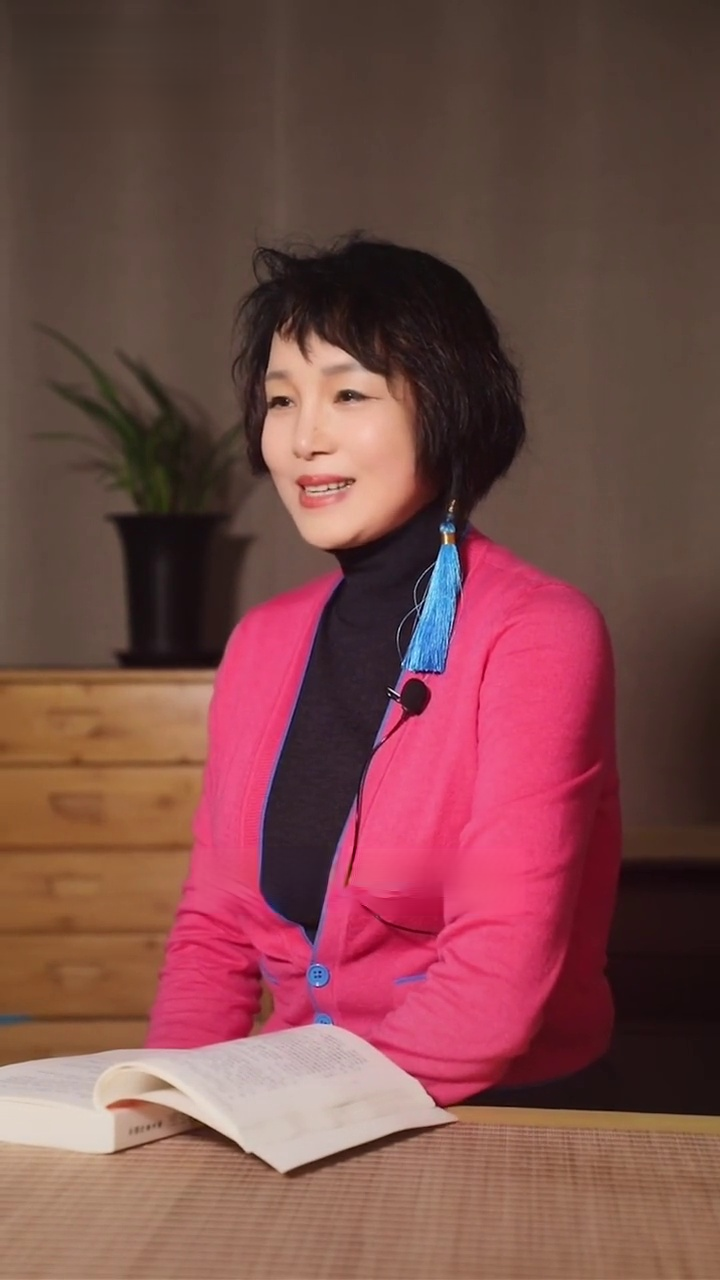

In [34]:
image = Image.open(os.path.join(se.frame_output_dir, "00000111.jpg"))

maskimg = np.zeros((shape[0], shape[1]), dtype=np.uint8)
maskimg = add_mask(maskimg, get_rec_area(get_douyin_rec((82, 159, 32, 71),w,h)))
maskimg = add_mask(maskimg, get_rec_area(get_douyin_hao_rec((20, 215, 92, 114),w,h)))
maskimg = add_mask(maskimg, get_rec_area((194, 526, 846, 916)))

save_mask("d:/mask_out.png", maskimg)

mask = get_mask_image(maskimg)
img = process_image(model, image, mask)
img

- douyin的mask的放大方法
- 连接frame的处理，原始视频里的帧号

In [152]:
image2 = Image.open(os.path.join(se.frame_output_dir, "00005541.jpg"))

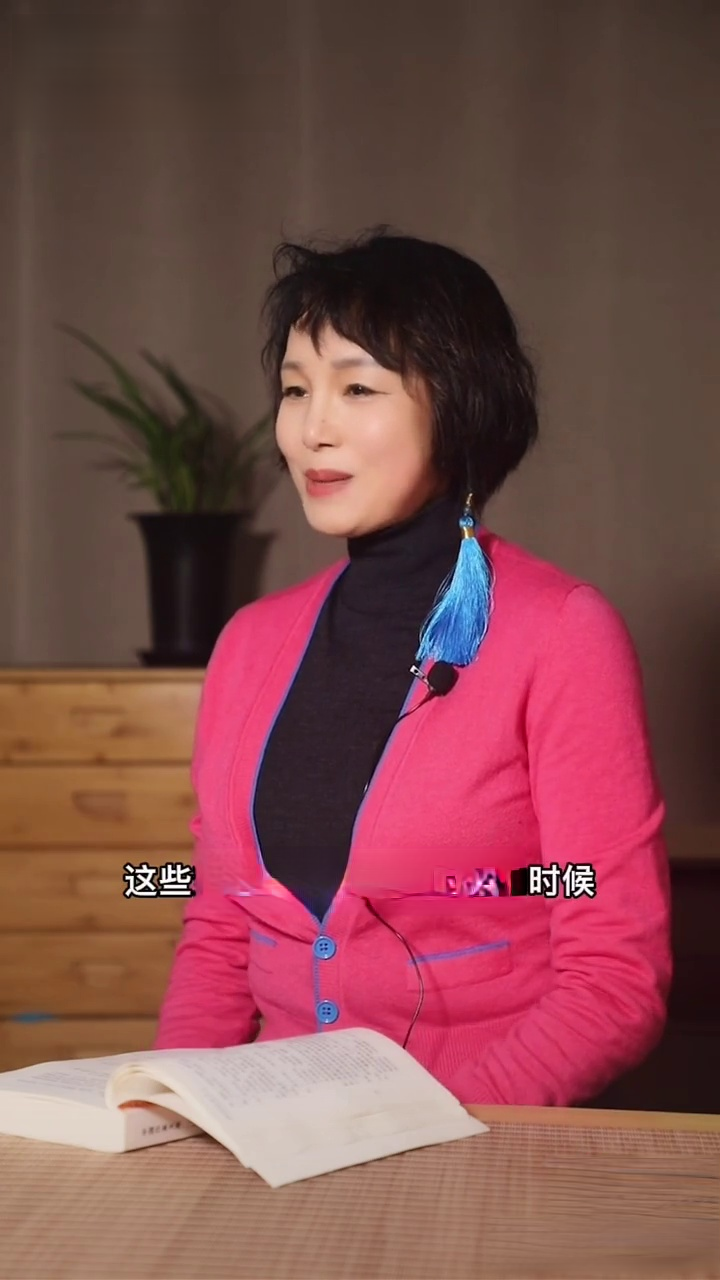

In [153]:
maskimg = add_mask(maskimg, get_rec_area(get_douyin_rec((618, 699, 1173, 1216), w, h)))
maskimg = add_mask(maskimg, get_rec_area(get_douyin_hao_rec((504, 699, 1233, 1256), w, h)))
maskimg = add_mask(maskimg, get_rec_area((194, 526, 846, 916)))
mask = get_mask_image(maskimg)

img = process_image(model, image2, mask)
img

In [39]:
img.save("d:/test_fill.jpg")

## 构建出完整mask序列，直接STTN进行修复即可

- 分批量建出mask，对比STTN的效果，与中间可以考虑使用crfill模型来静态修复

In [22]:
frame_content

NameError: name 'frame_content' is not defined

In [41]:
vd_path = "d:/douxiao_s7.mp4"

In [48]:
#需要传入整体字幕区域，对于第一个区域内的字幕需要标记，并且在取mask时再靠前
mask_cache = {}

def make_content_mask(maskimg, content, w, h):
    for item in content:
        if "抖音\n" == item[1]:             
            maskimg = add_mask(maskimg, get_rec_area(get_douyin_rec(item[0], w, h)))
        if "抖音号：" == item[1][:4]:            
            maskimg = add_mask(maskimg, get_rec_area(get_douyin_hao_rec(item[0], w, h)))
        else:
            maskimg = add_mask(maskimg, get_rec_area(grow_rec(item[0], w, h)))        
    return maskimg


def get_frame_mask(frame_no, frame_content=frame_content, w=w, h=h):
    #优化，直接先建立全部masking表，避免重新计算    
    pre_k, found_k = -1, -1
    for k in frame_content:
        if frame_no >= k:
            pre_k = k
        else:
            found_k = k
            break

    if pre_k in mask_cache:
        return mask_cache[pre_k]
    
    a_maskimg = np.zeros((h, w), dtype=np.uint8)
    
    #比较接着的两张之间的坐标，合并两者的mask
    if pre_k < found_k:
        #两张全部加入到mask中
        pre_content = frame_content[pre_k]        
        next_content = frame_content[found_k]
        a_maskimg = make_content_mask(a_maskimg, pre_content, w, h)        
        a_maskimg = make_content_mask(a_maskimg, next_content, w, h)
    else:
        content = frame_content[pre_k]
        a_maskimg = make_content_mask(a_maskimg, content, w, h)
    
    mask_cache[pre_k] = a_maskimg
    
    return a_maskimg

In [20]:
video_cap = cv2.VideoCapture(vd_path)

frame_no = 0
while video_cap.isOpened():
    ret, frame = video_cap.read()    
    if not ret:
        break
    else:
        frame_no += 1
        masking = get_frame_mask(frame_no)
        filename = os.path.join("e:/Temp_Output/test_mask", str(frame_no).zfill(8) + '.png')
        save_mask(filename, masking)

video_cap.release()
#print(frame_no)

NameError: name 'get_frame_mask' is not defined

In [49]:
video_cap = cv2.VideoCapture(vd_path)

frame_no = 0
while video_cap.isOpened():
    ret, frame = video_cap.read()    
    if not ret:
        break
    else:
        frame_no += 1
        masking = get_frame_mask(frame_no)
        
        img = process_image(model, get_mask_image(frame), get_mask_image(masking))
        filename = os.path.join("e:/Temp_Output/test_filled", str(frame_no).zfill(8) + '.png')
        img.save(filename)
        #save_mask(filename, img)

KeyboardInterrupt: 

In [53]:
writer = cv2.VideoWriter(f"e:/Temp_Output/test_filled_result.mp4", cv2.VideoWriter_fourcc(*"x264"), 30, (720, 1280))

video_cap = cv2.VideoCapture(vd_path)
frame_no = 0
while video_cap.isOpened():
    ret, frame = video_cap.read()    
    if not ret:
        break
    else:
        frame_no += 1
        masking = get_frame_mask(frame_no)
        img = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        img = Image.fromarray(img)        
        img = process_image(model, img, get_mask_image(masking))
        filename = os.path.join("e:/Temp_Output/test_filled", str(frame_no).zfill(8) + '.png')
        img.save(filename)
        writer.write( cv2.cvtColor(np.array(img).astype(np.uint8), cv2.COLOR_BGR2RGB))

writer.release()